## 스튜던트 t분포 - Student-t Distribution

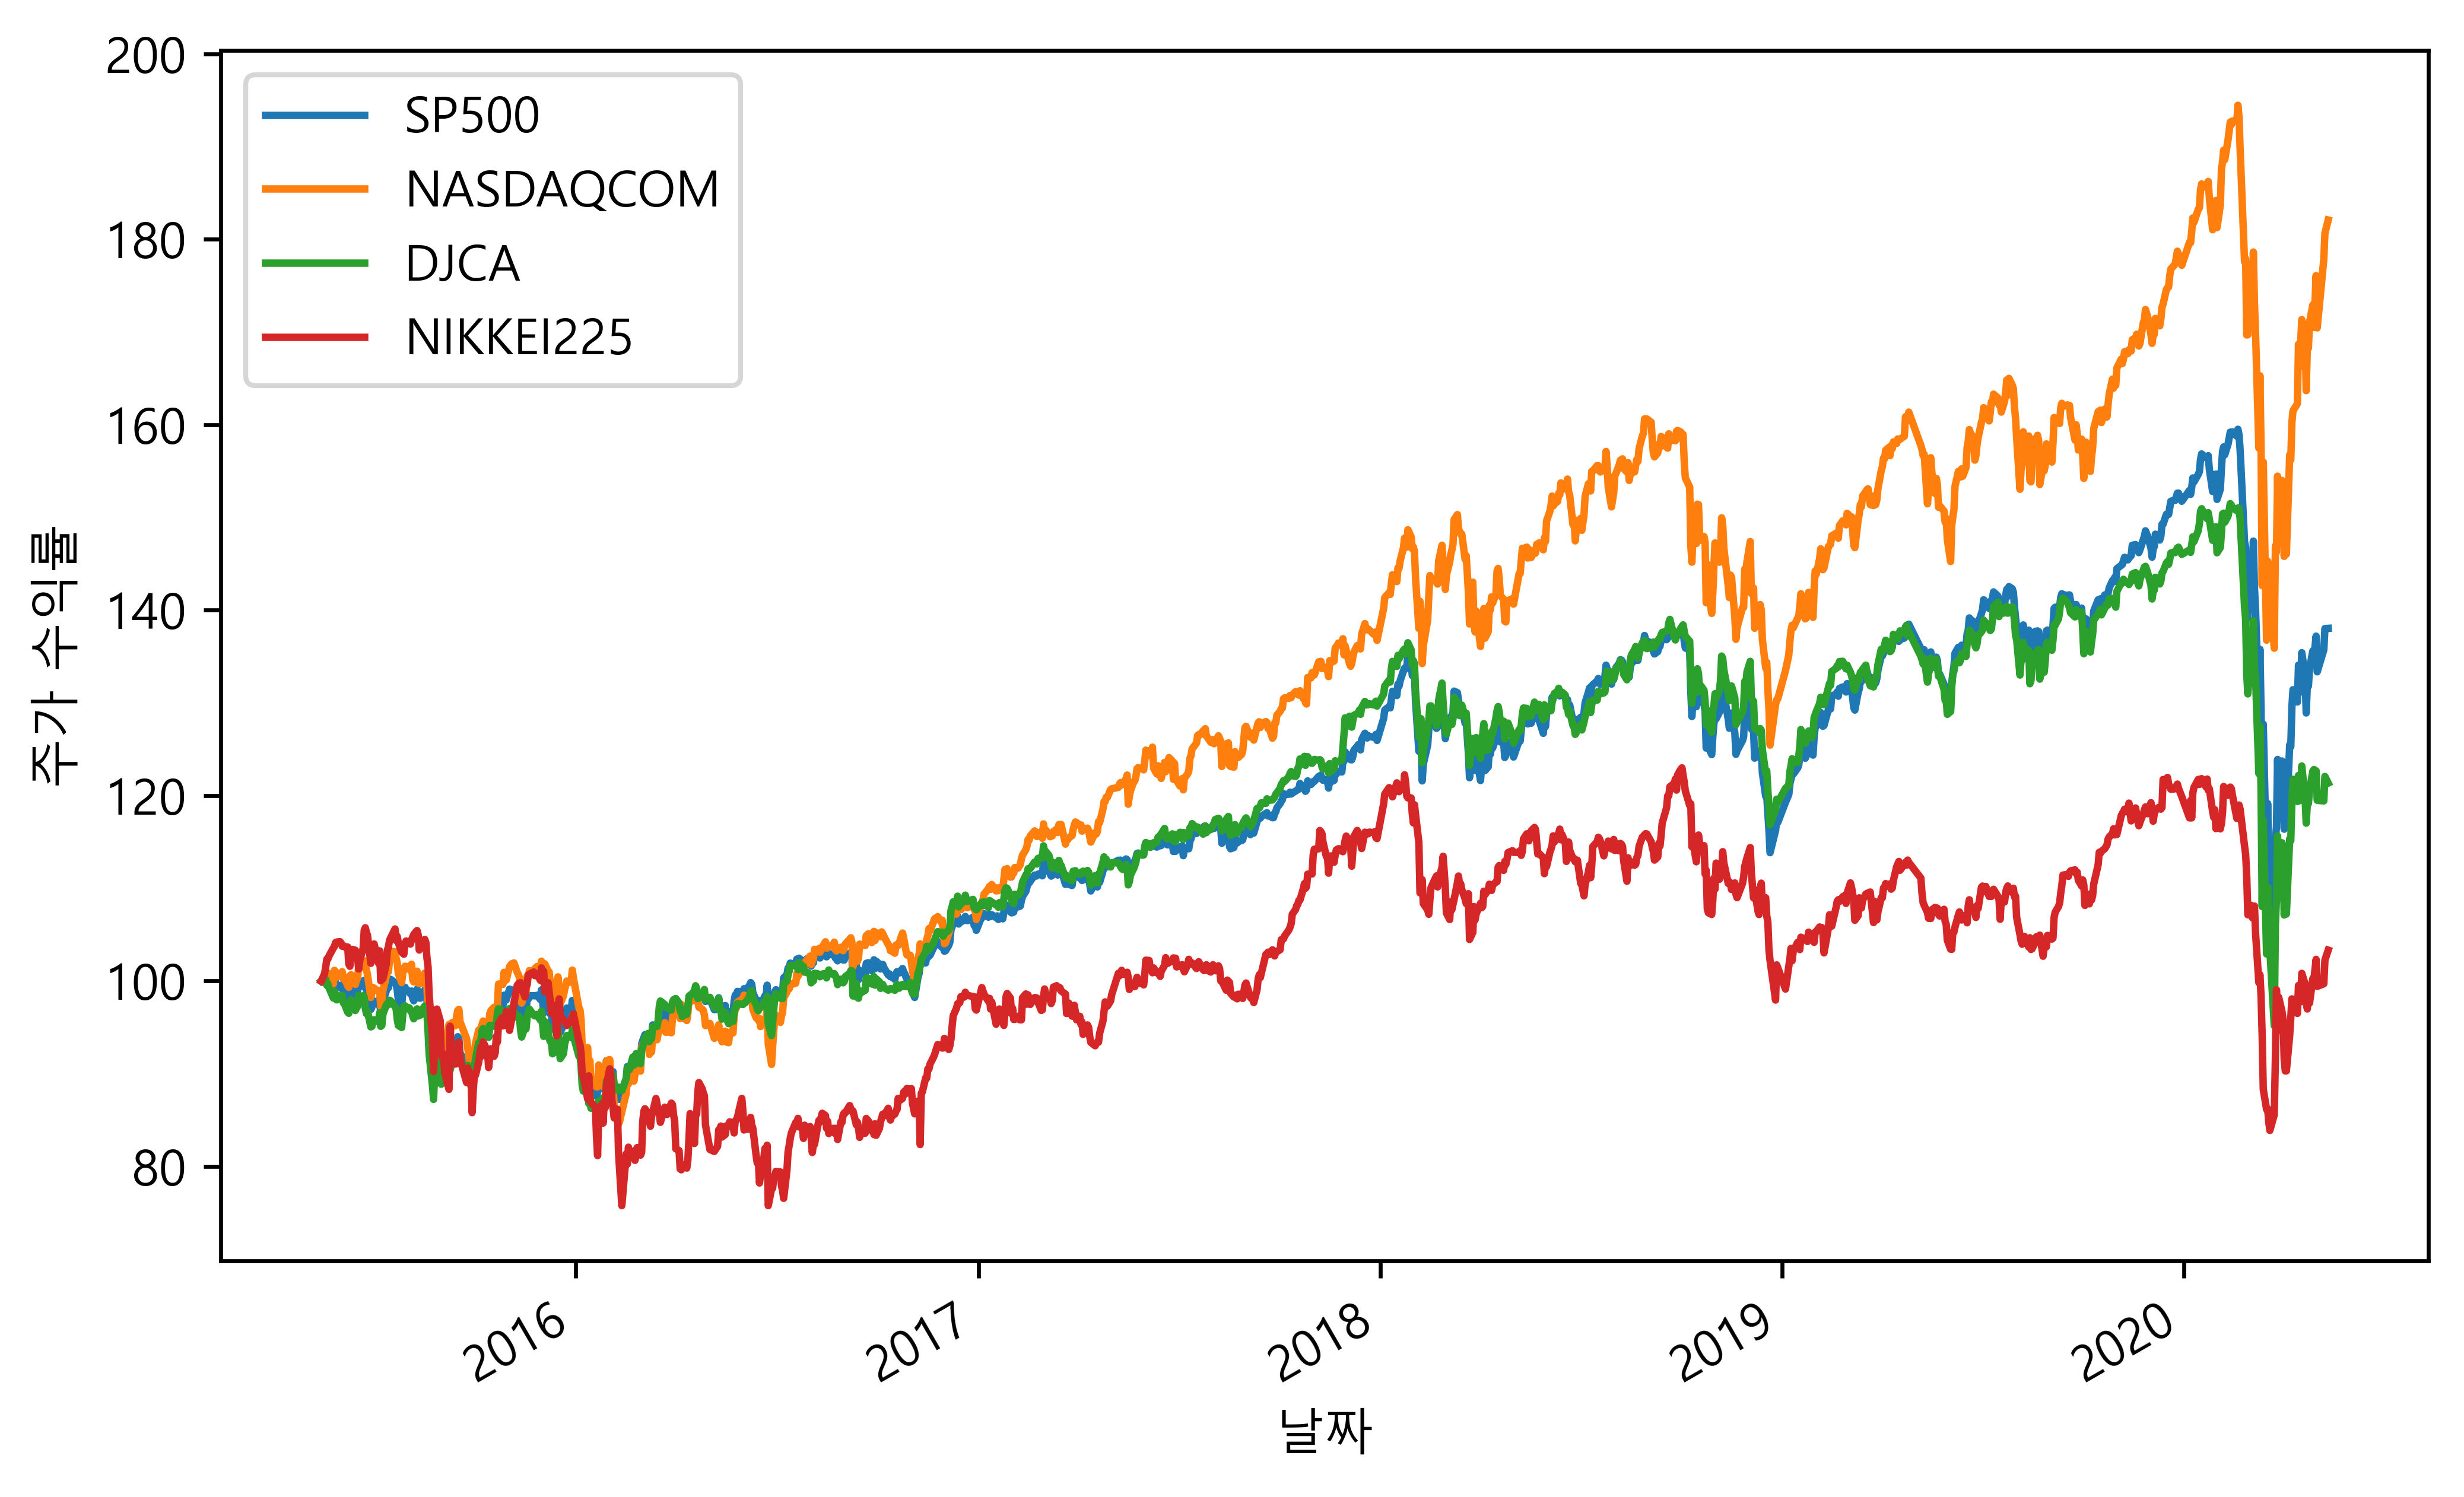

In [5]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.xlabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

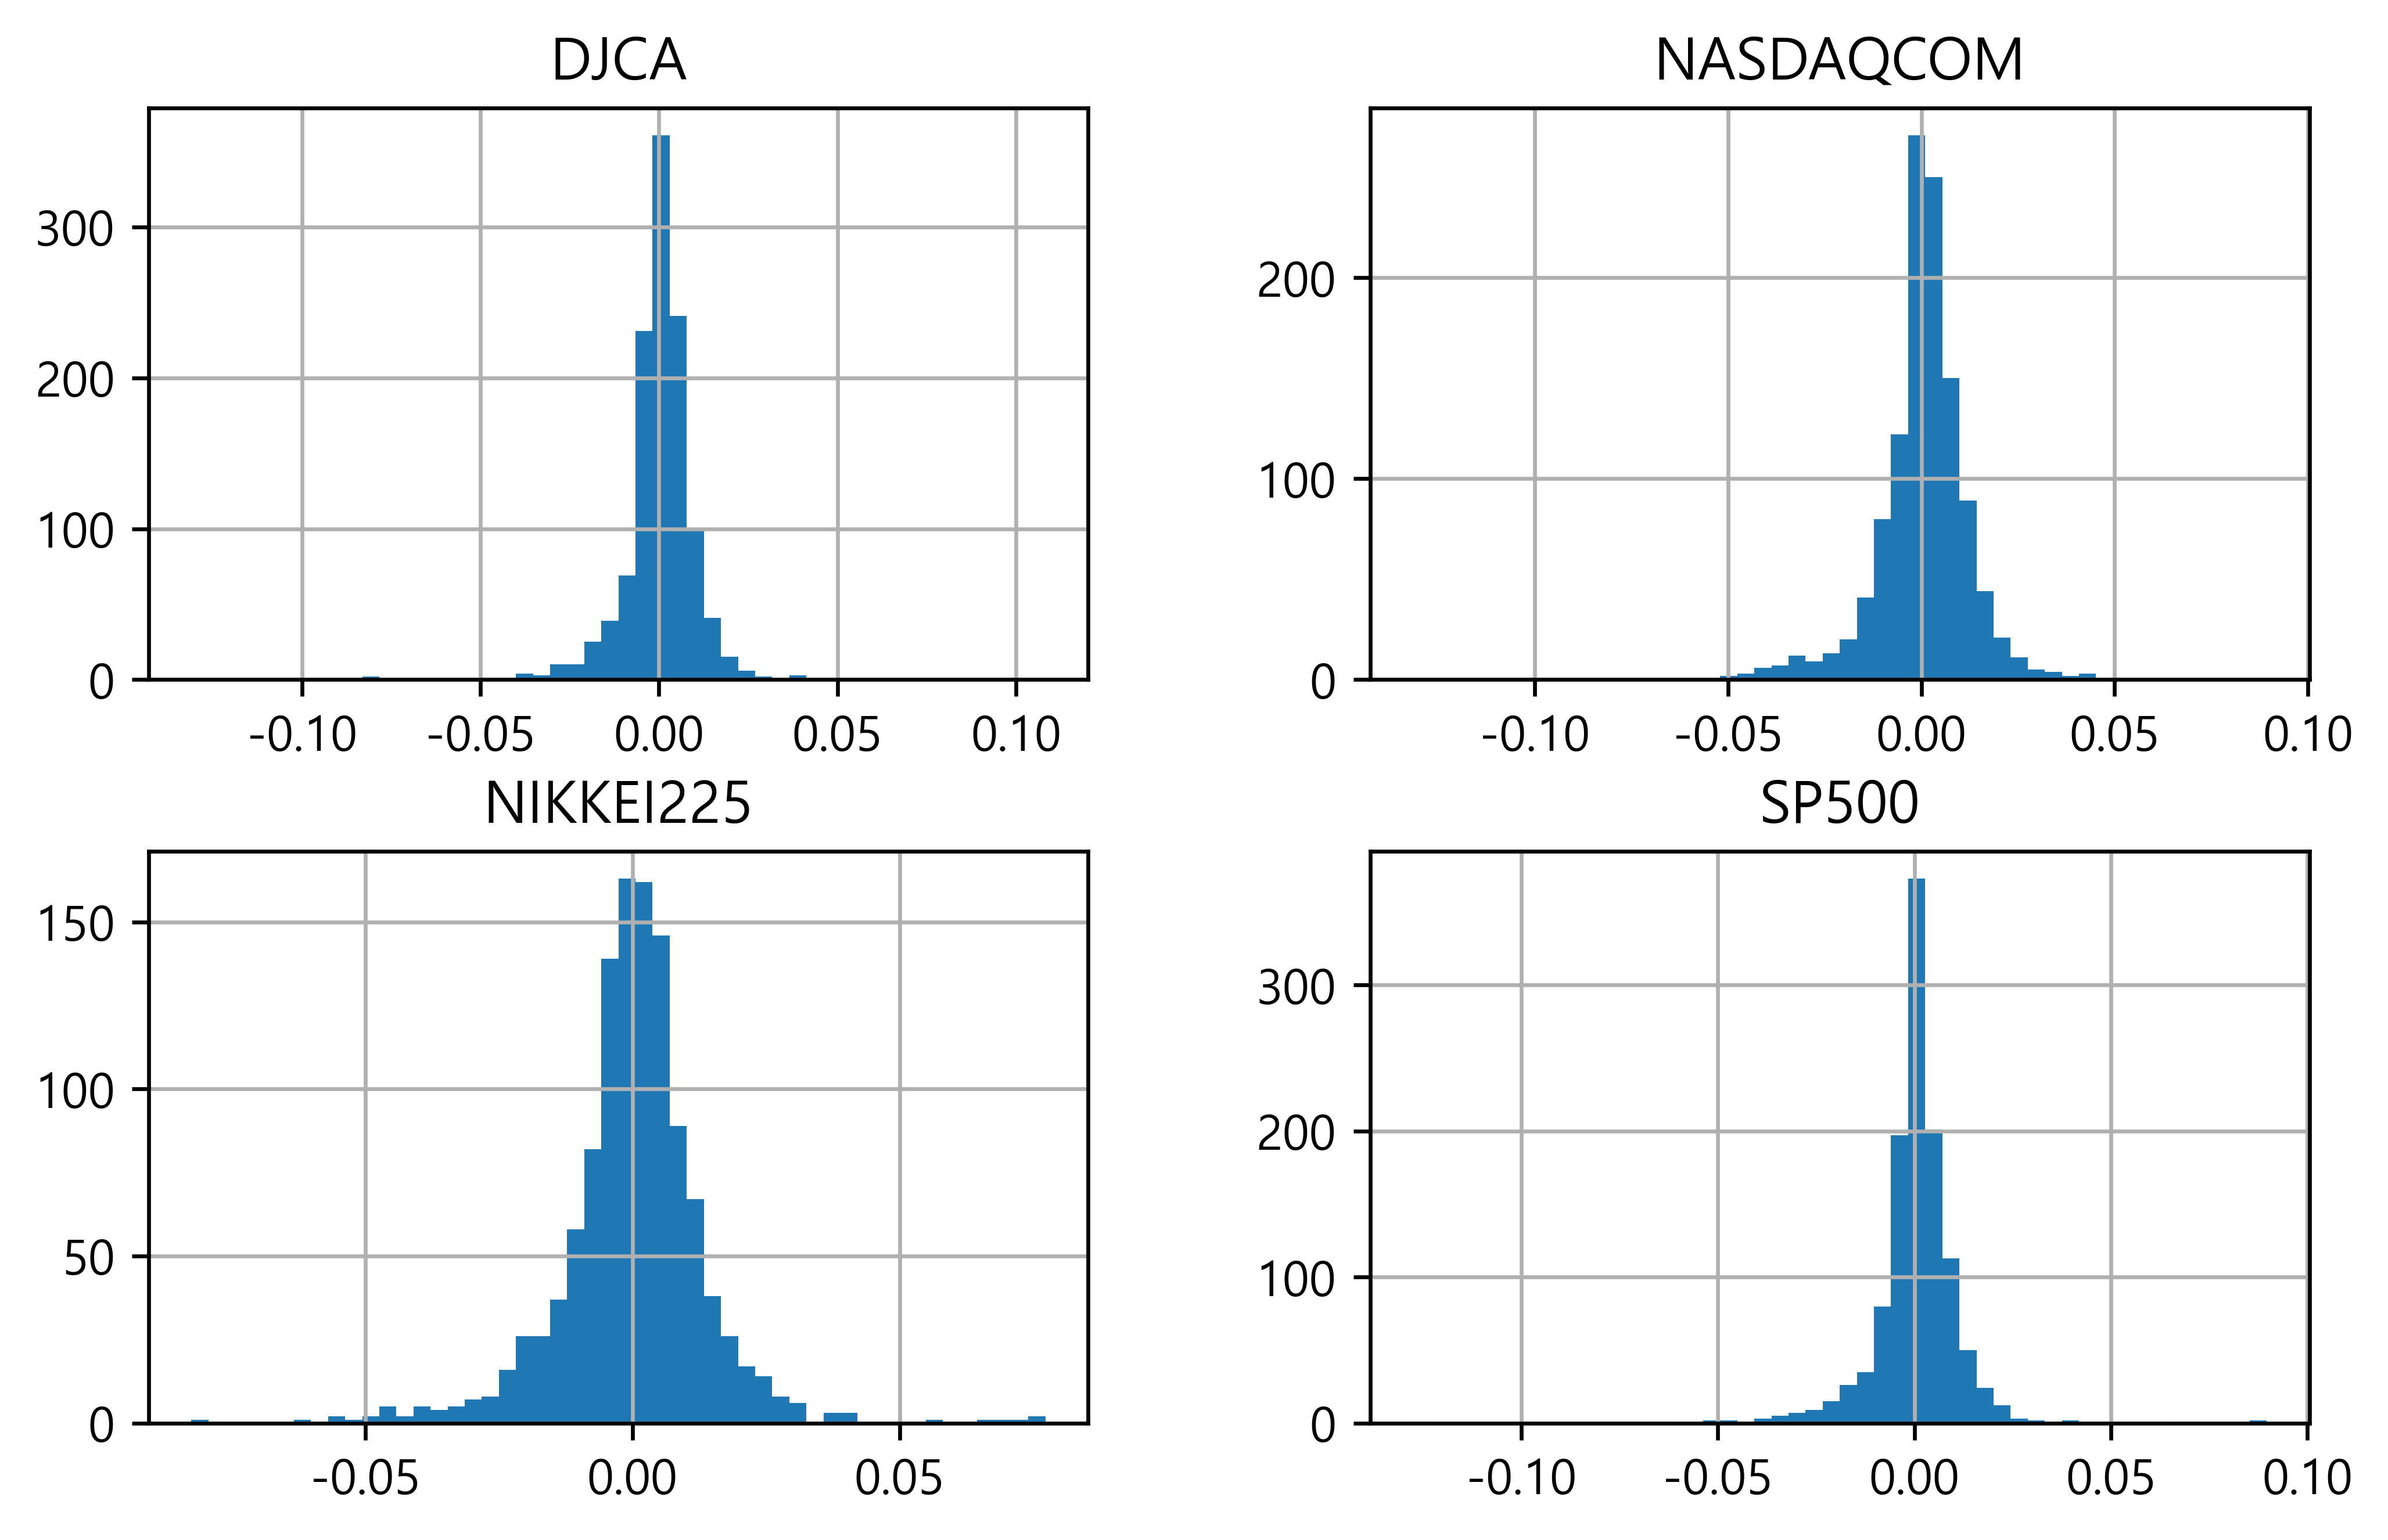

In [7]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

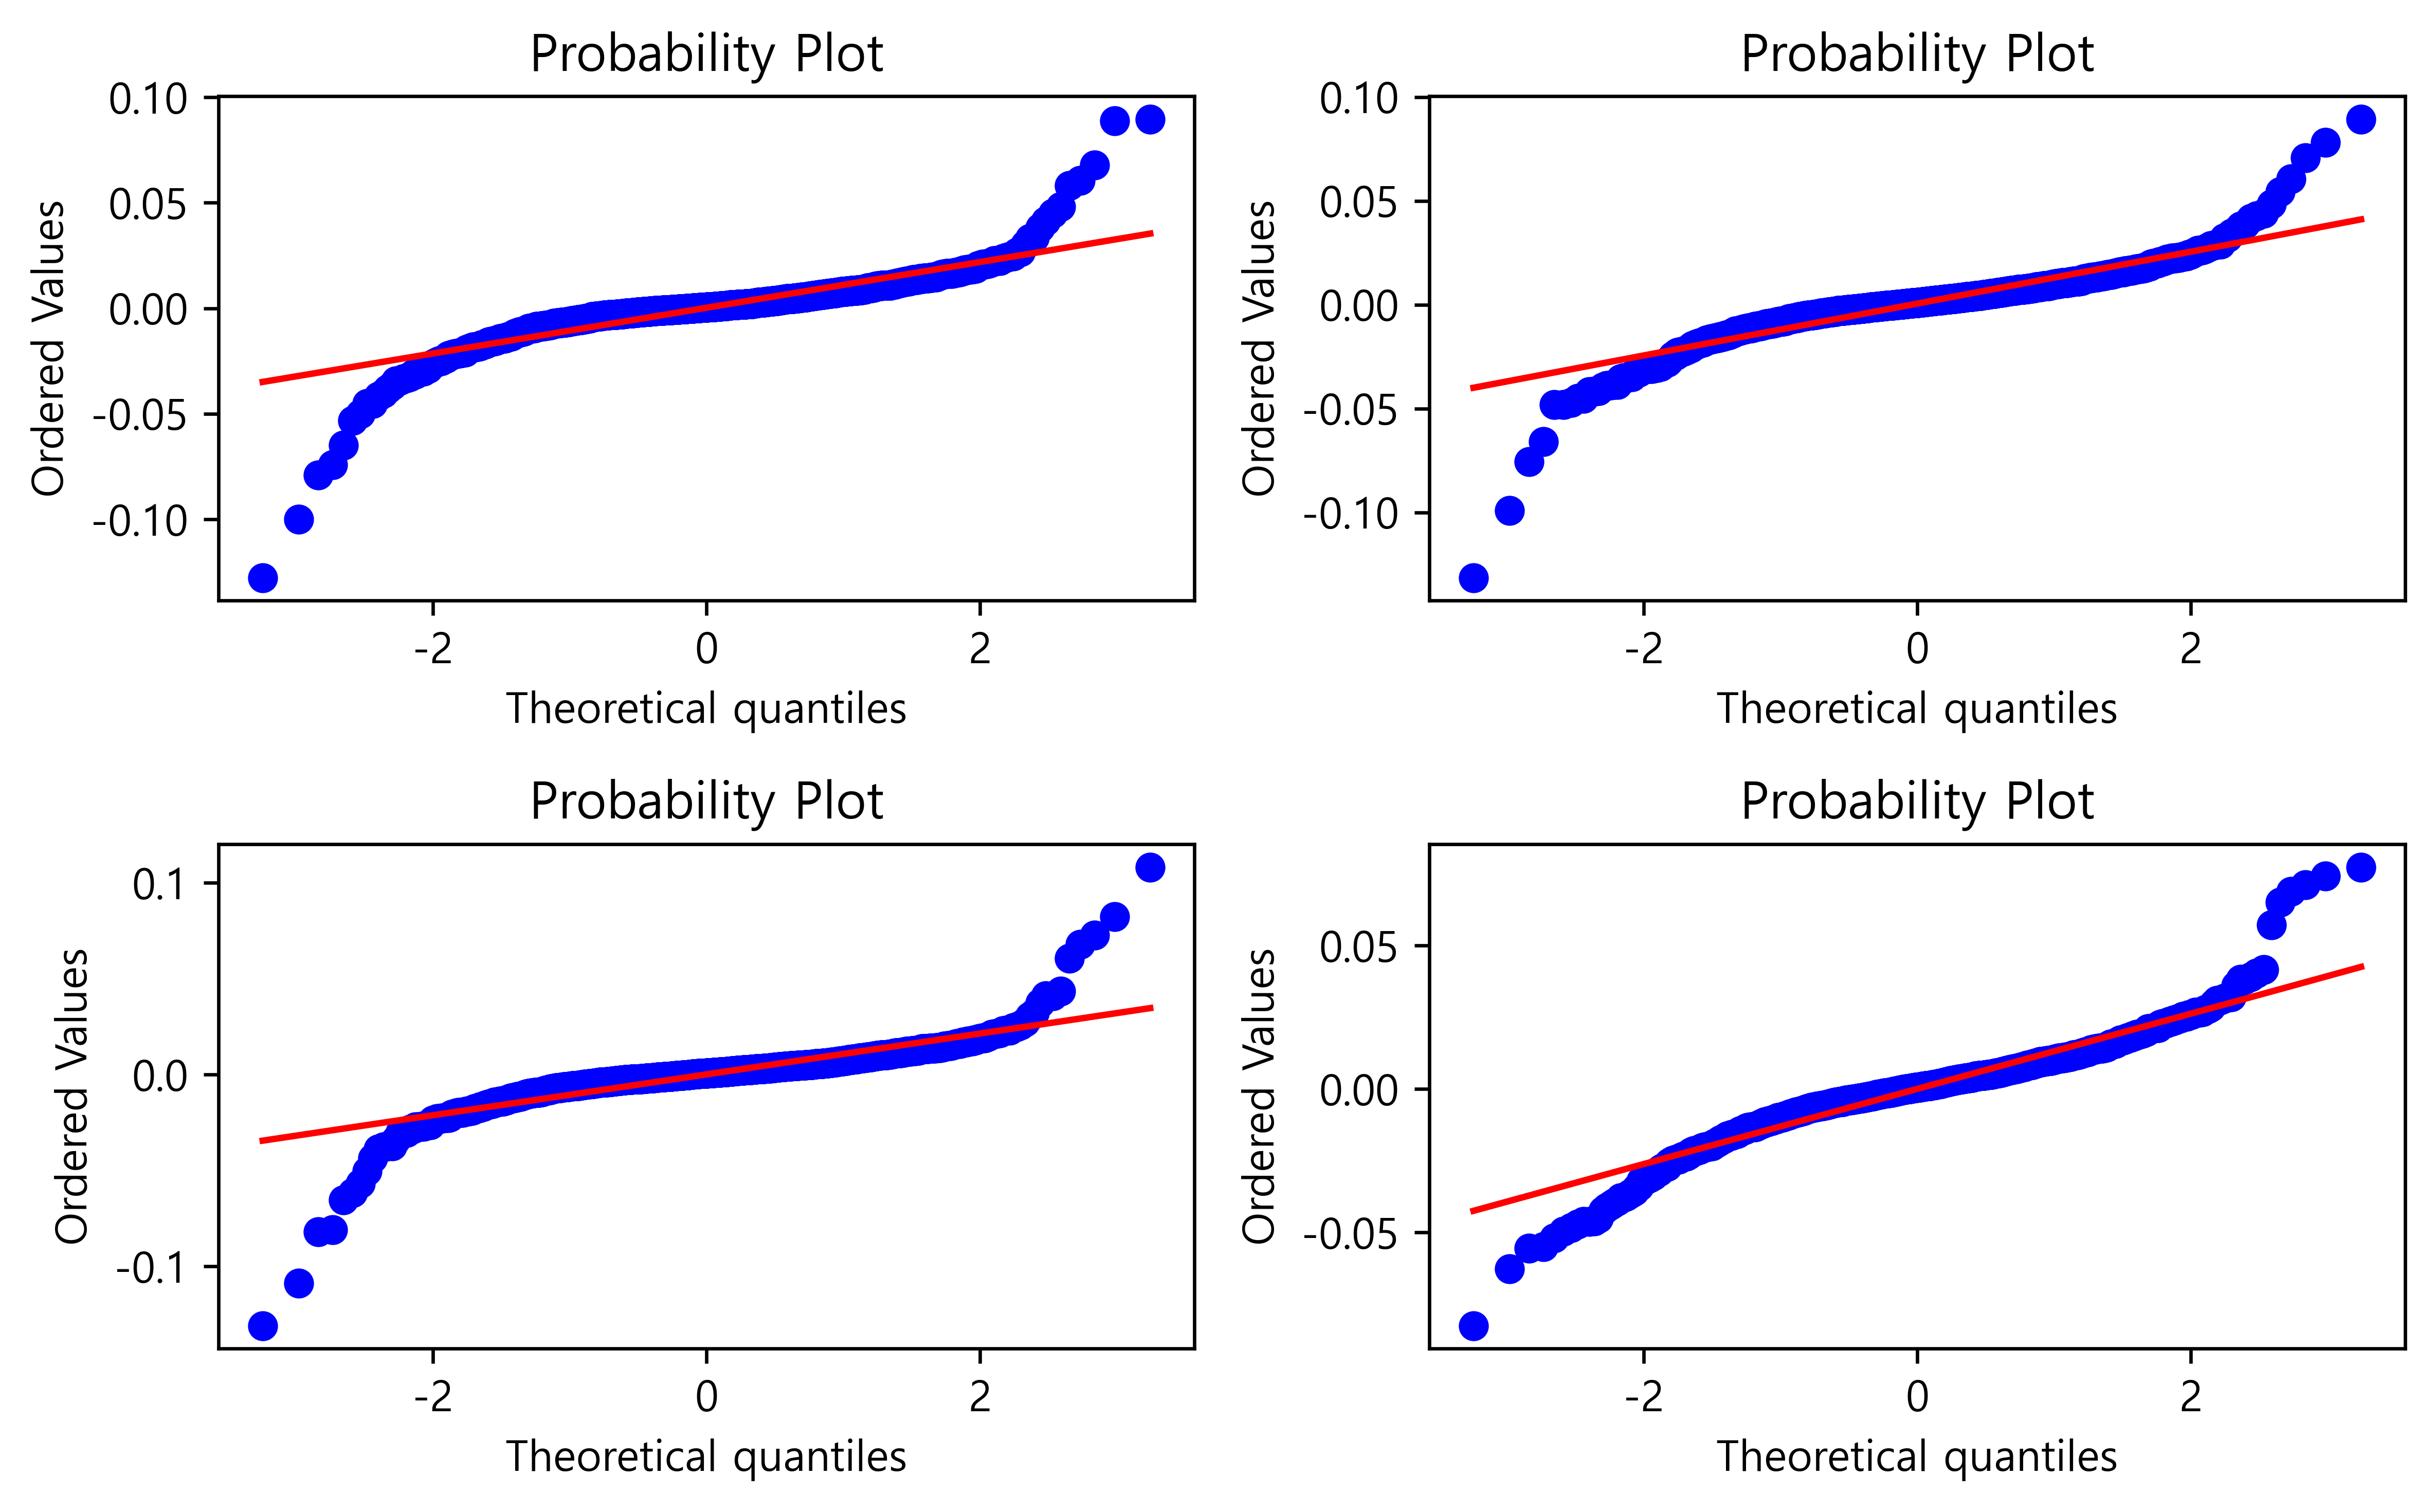

In [8]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

위와 같이 정규분포보다 더 극단적인 경우가 많이 발생하며 팻테일을 보이는 데이터 모형에 적합한 것이 스튜던트 t분포 (student-t distribution) 혹은 t분포라고 한다.

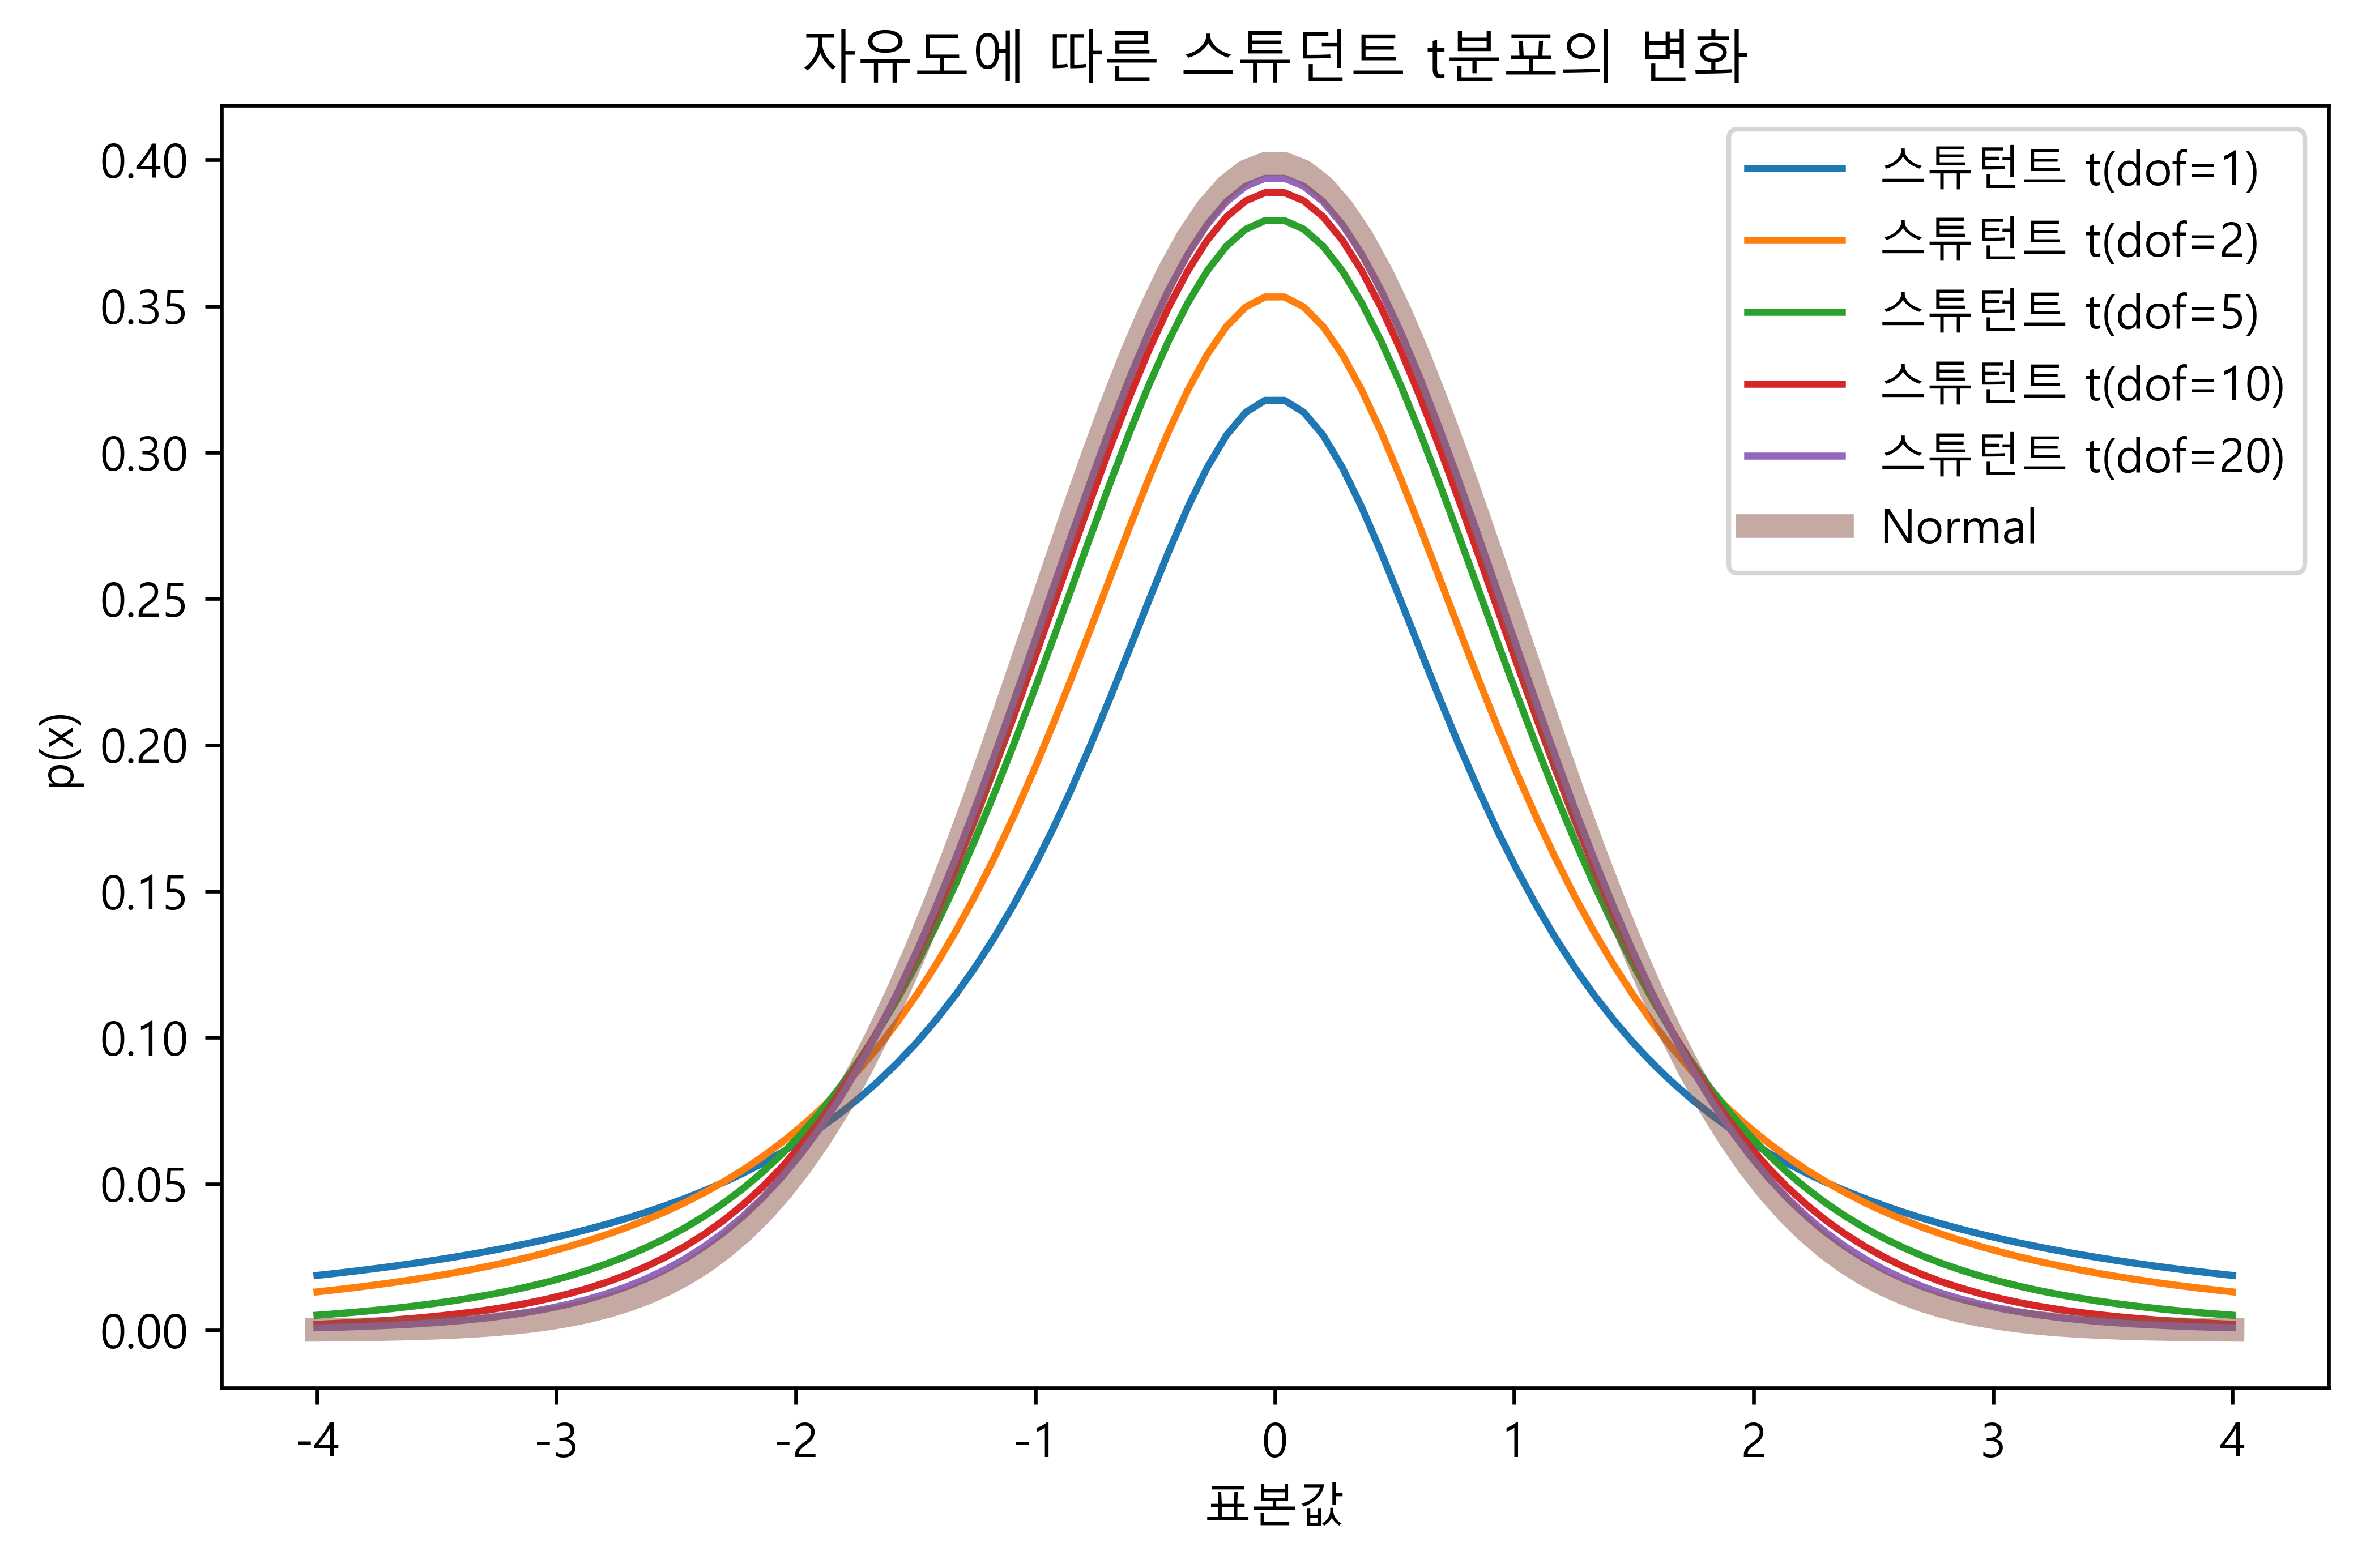

In [11]:
# To draw pdf of Student-t Distribution, scipy.stats.t is used
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df) # df = 자유도
    plt.plot(xx, rv.pdf(xx), label=("스튜턴트 t(dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

### t 통계량

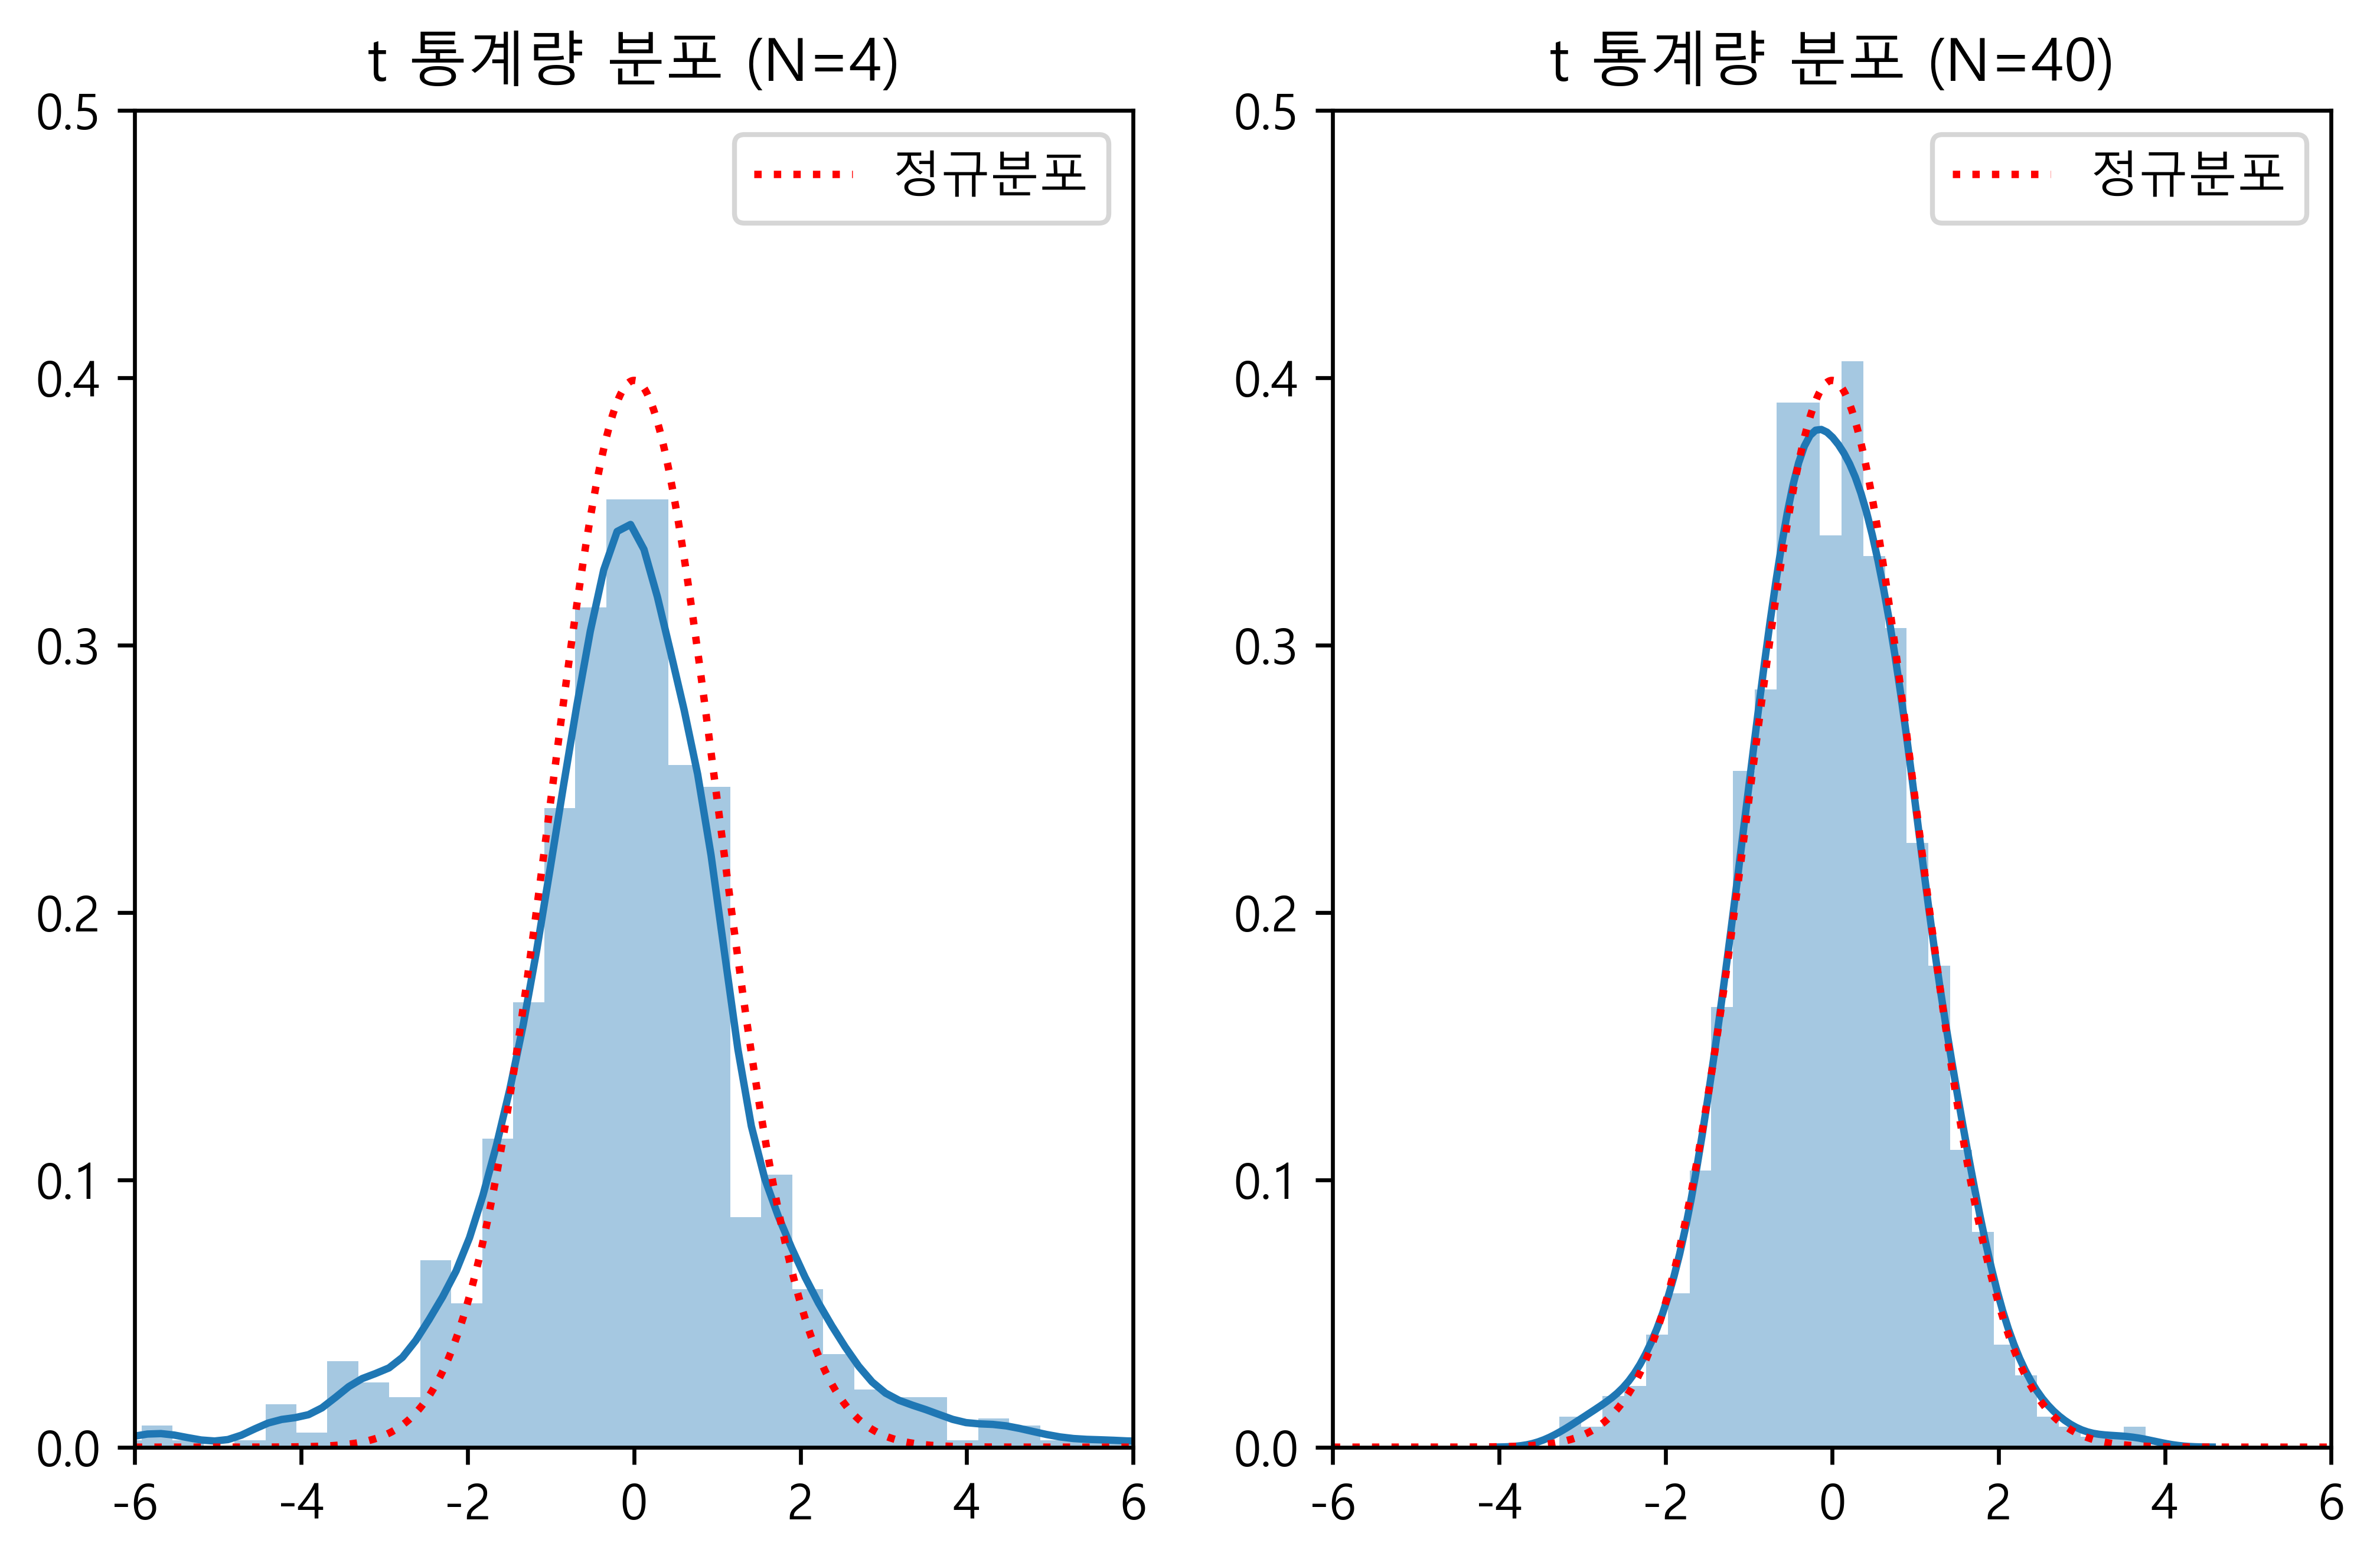

In [15]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N=4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N=40)")
plt.legend()

plt.show()

### 카이제곱분포

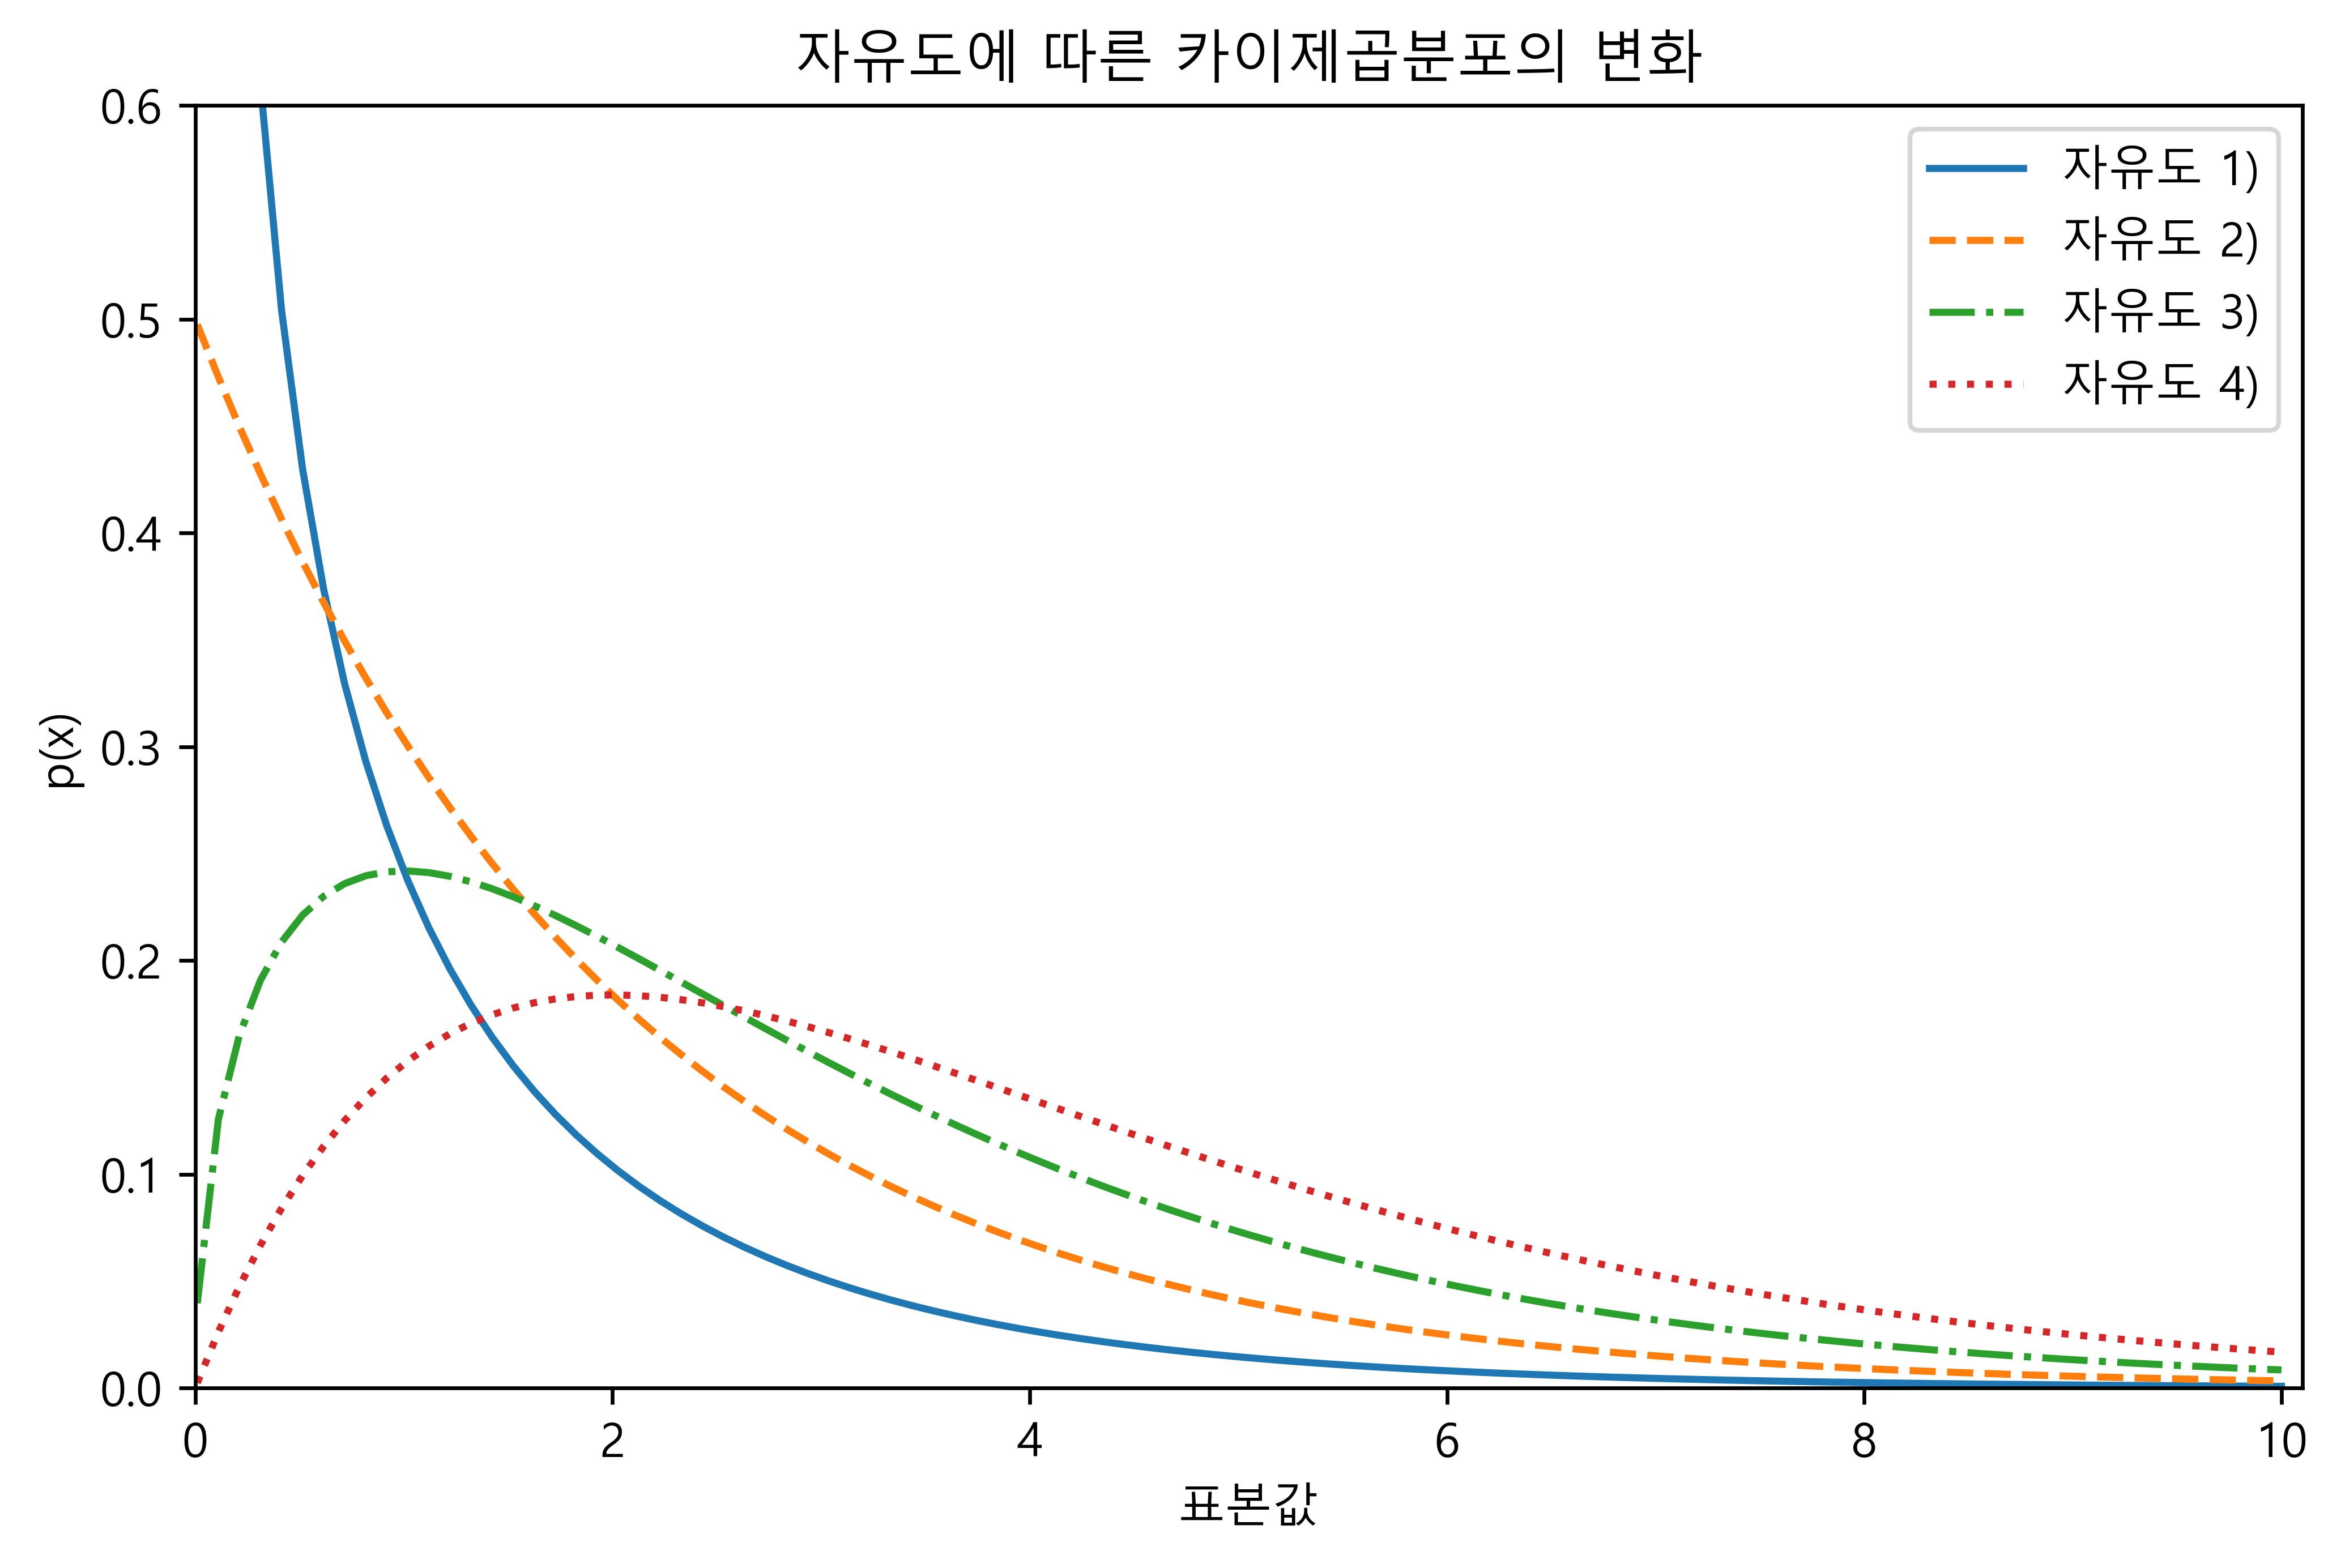

In [17]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

카이제곱분포에서 특이한 점은 제곱함을 하는 표본 수가 `2보다 커지면 0근처의 값이 가장 많이 발생할 것이라는 직관과 달리` `0보다 큰 어떤 수가 더 흔하게 발생한다는 점`이다. 시뮬레이션을 통해 실제로 제곱합의 분포를 살펴보면 다음과 같다. `왼쪽은 정규분포의 표본을 단순히 제곱한 값의 분포`이고 `오른쪽은 정규분포의 표본 4개를 제곱하여 합한 값의 분포`다. 오른쪽 분포는 0이 아닌 `1 근처의 값이 가장 많이 나오는 것`을 볼 수 있다.

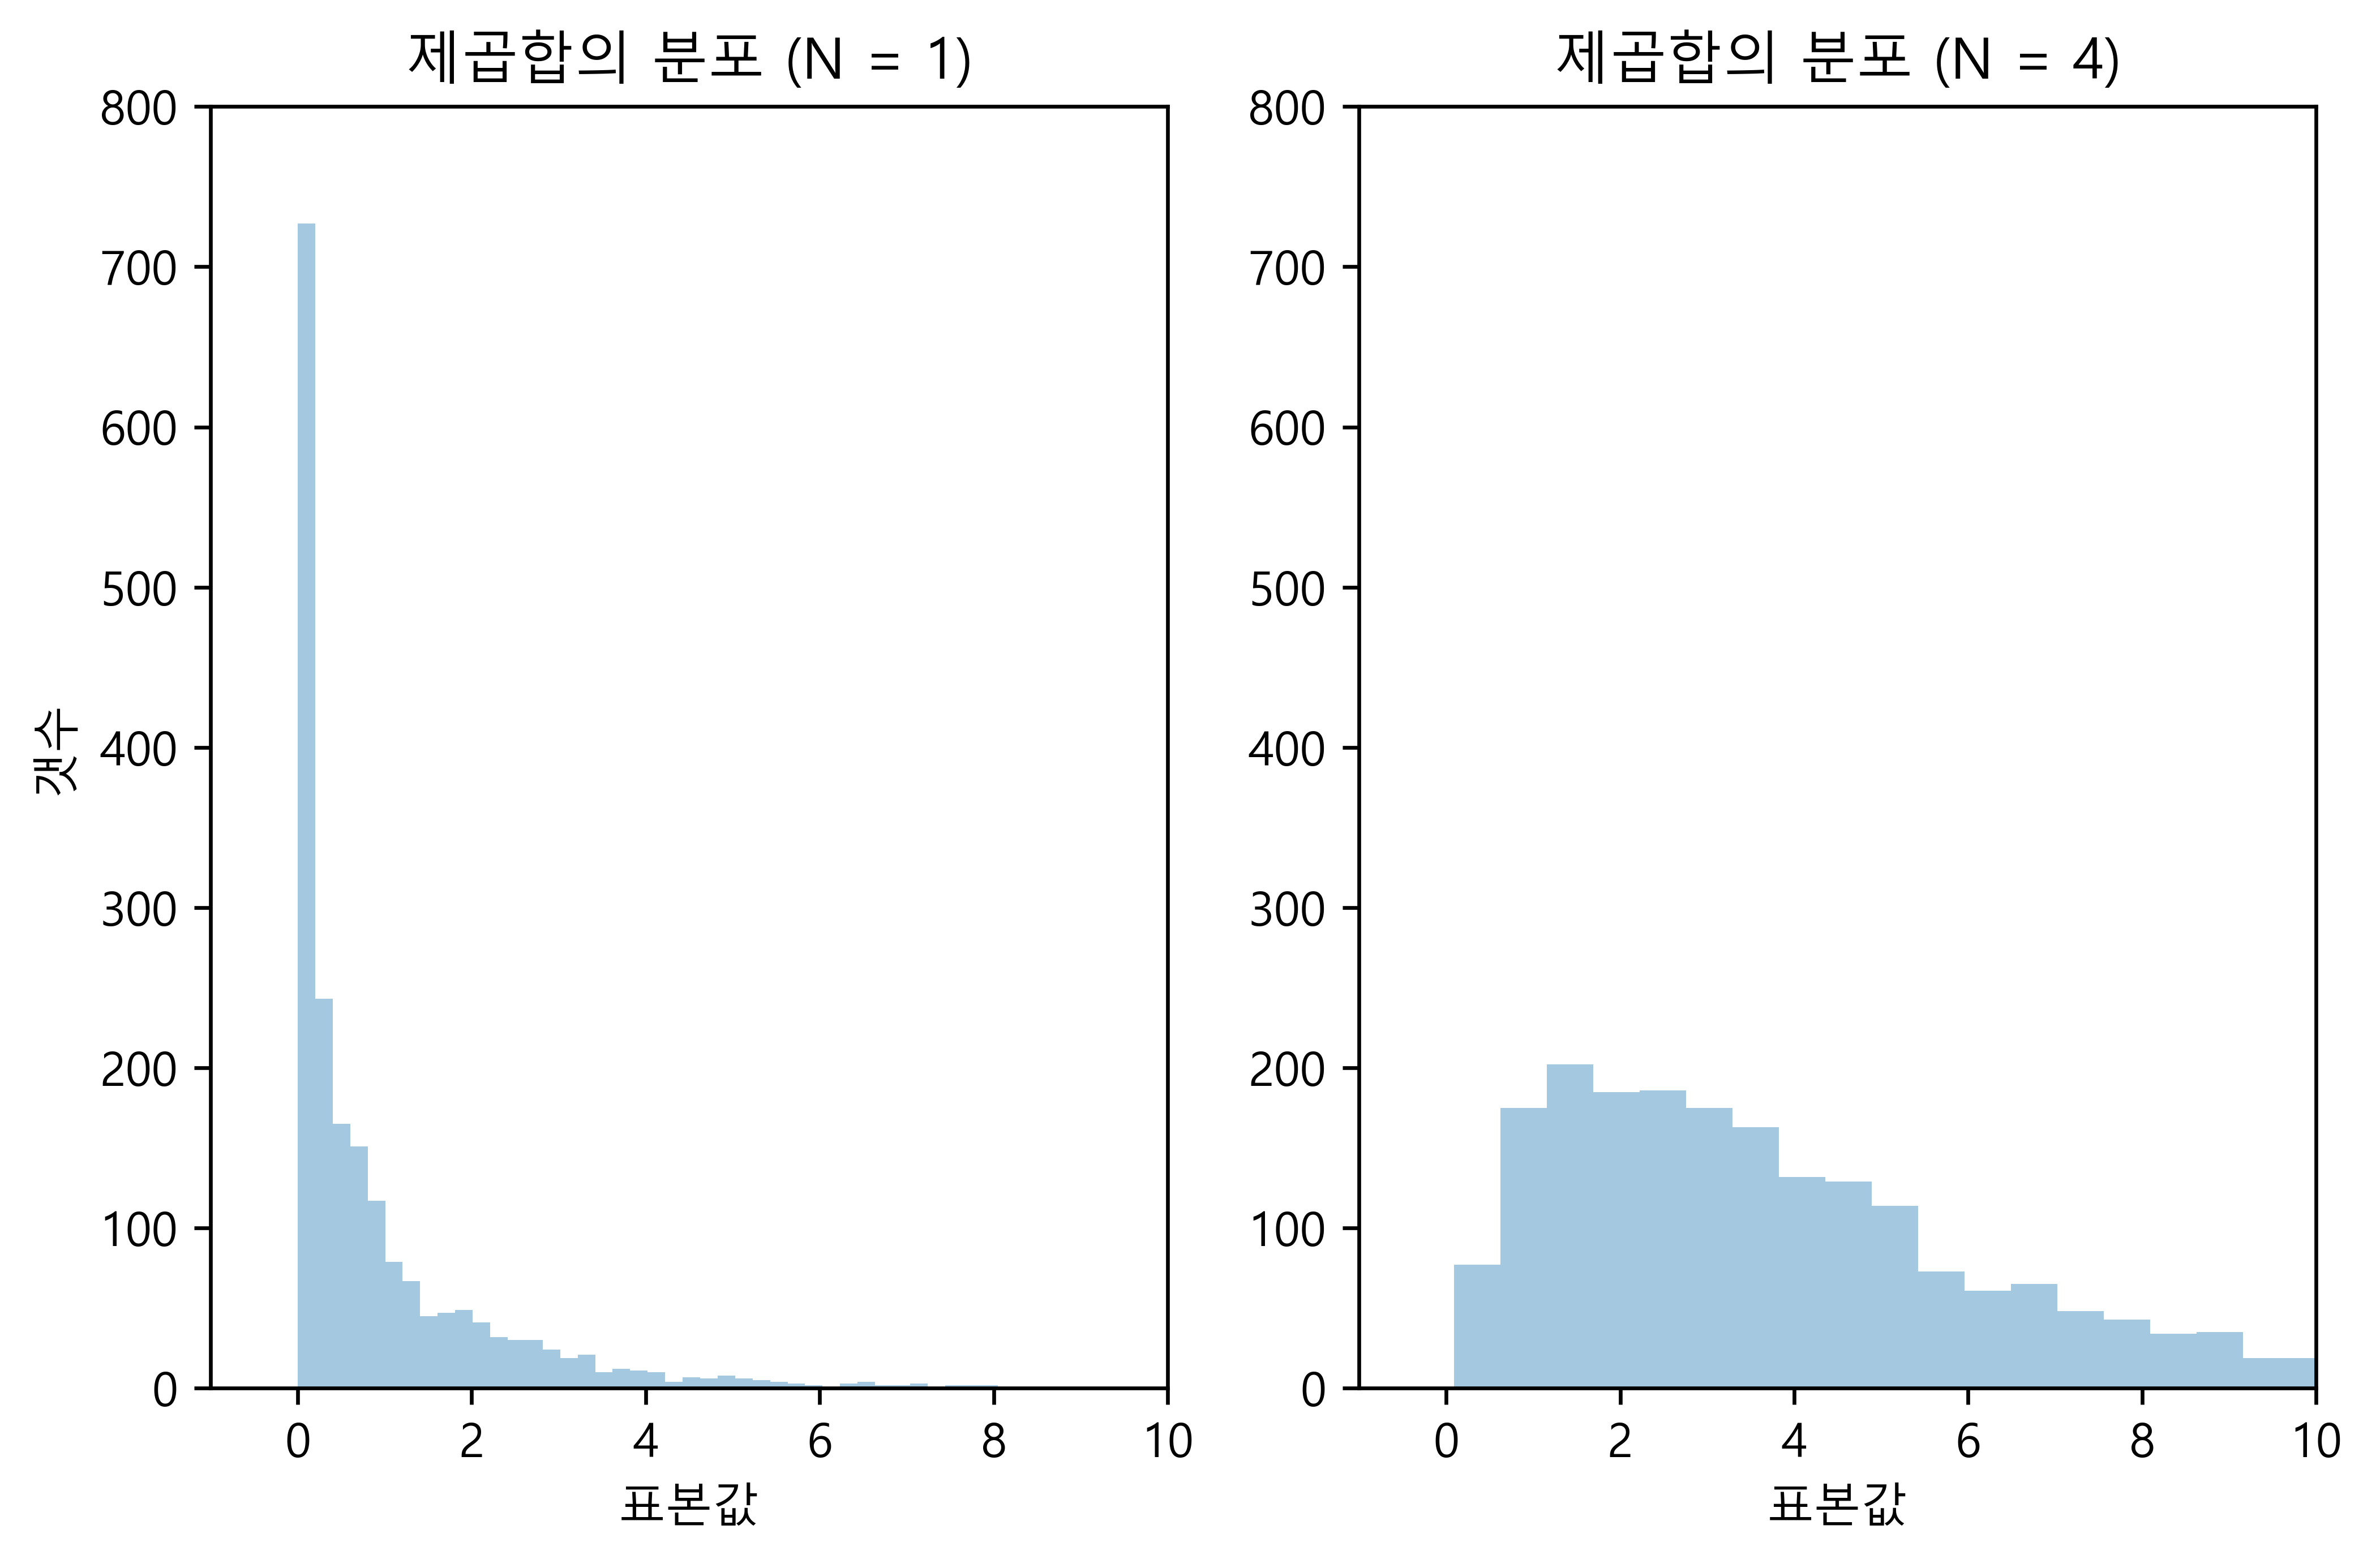

In [19]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 1)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 4)")
plt.xlabel("표본값")

plt.show()

### 연습 문제 8.5.1
왜 위와 같은 현상이 발생하는 것일까? 이를 알아보기 위해 N이 다음과 같을 때 정규분포에서 나온 표본의 제곱합이 이루는 분포를 구하고 히스토그램으로 나타내라.

1. N = 6일 때
2. N = 30일 때

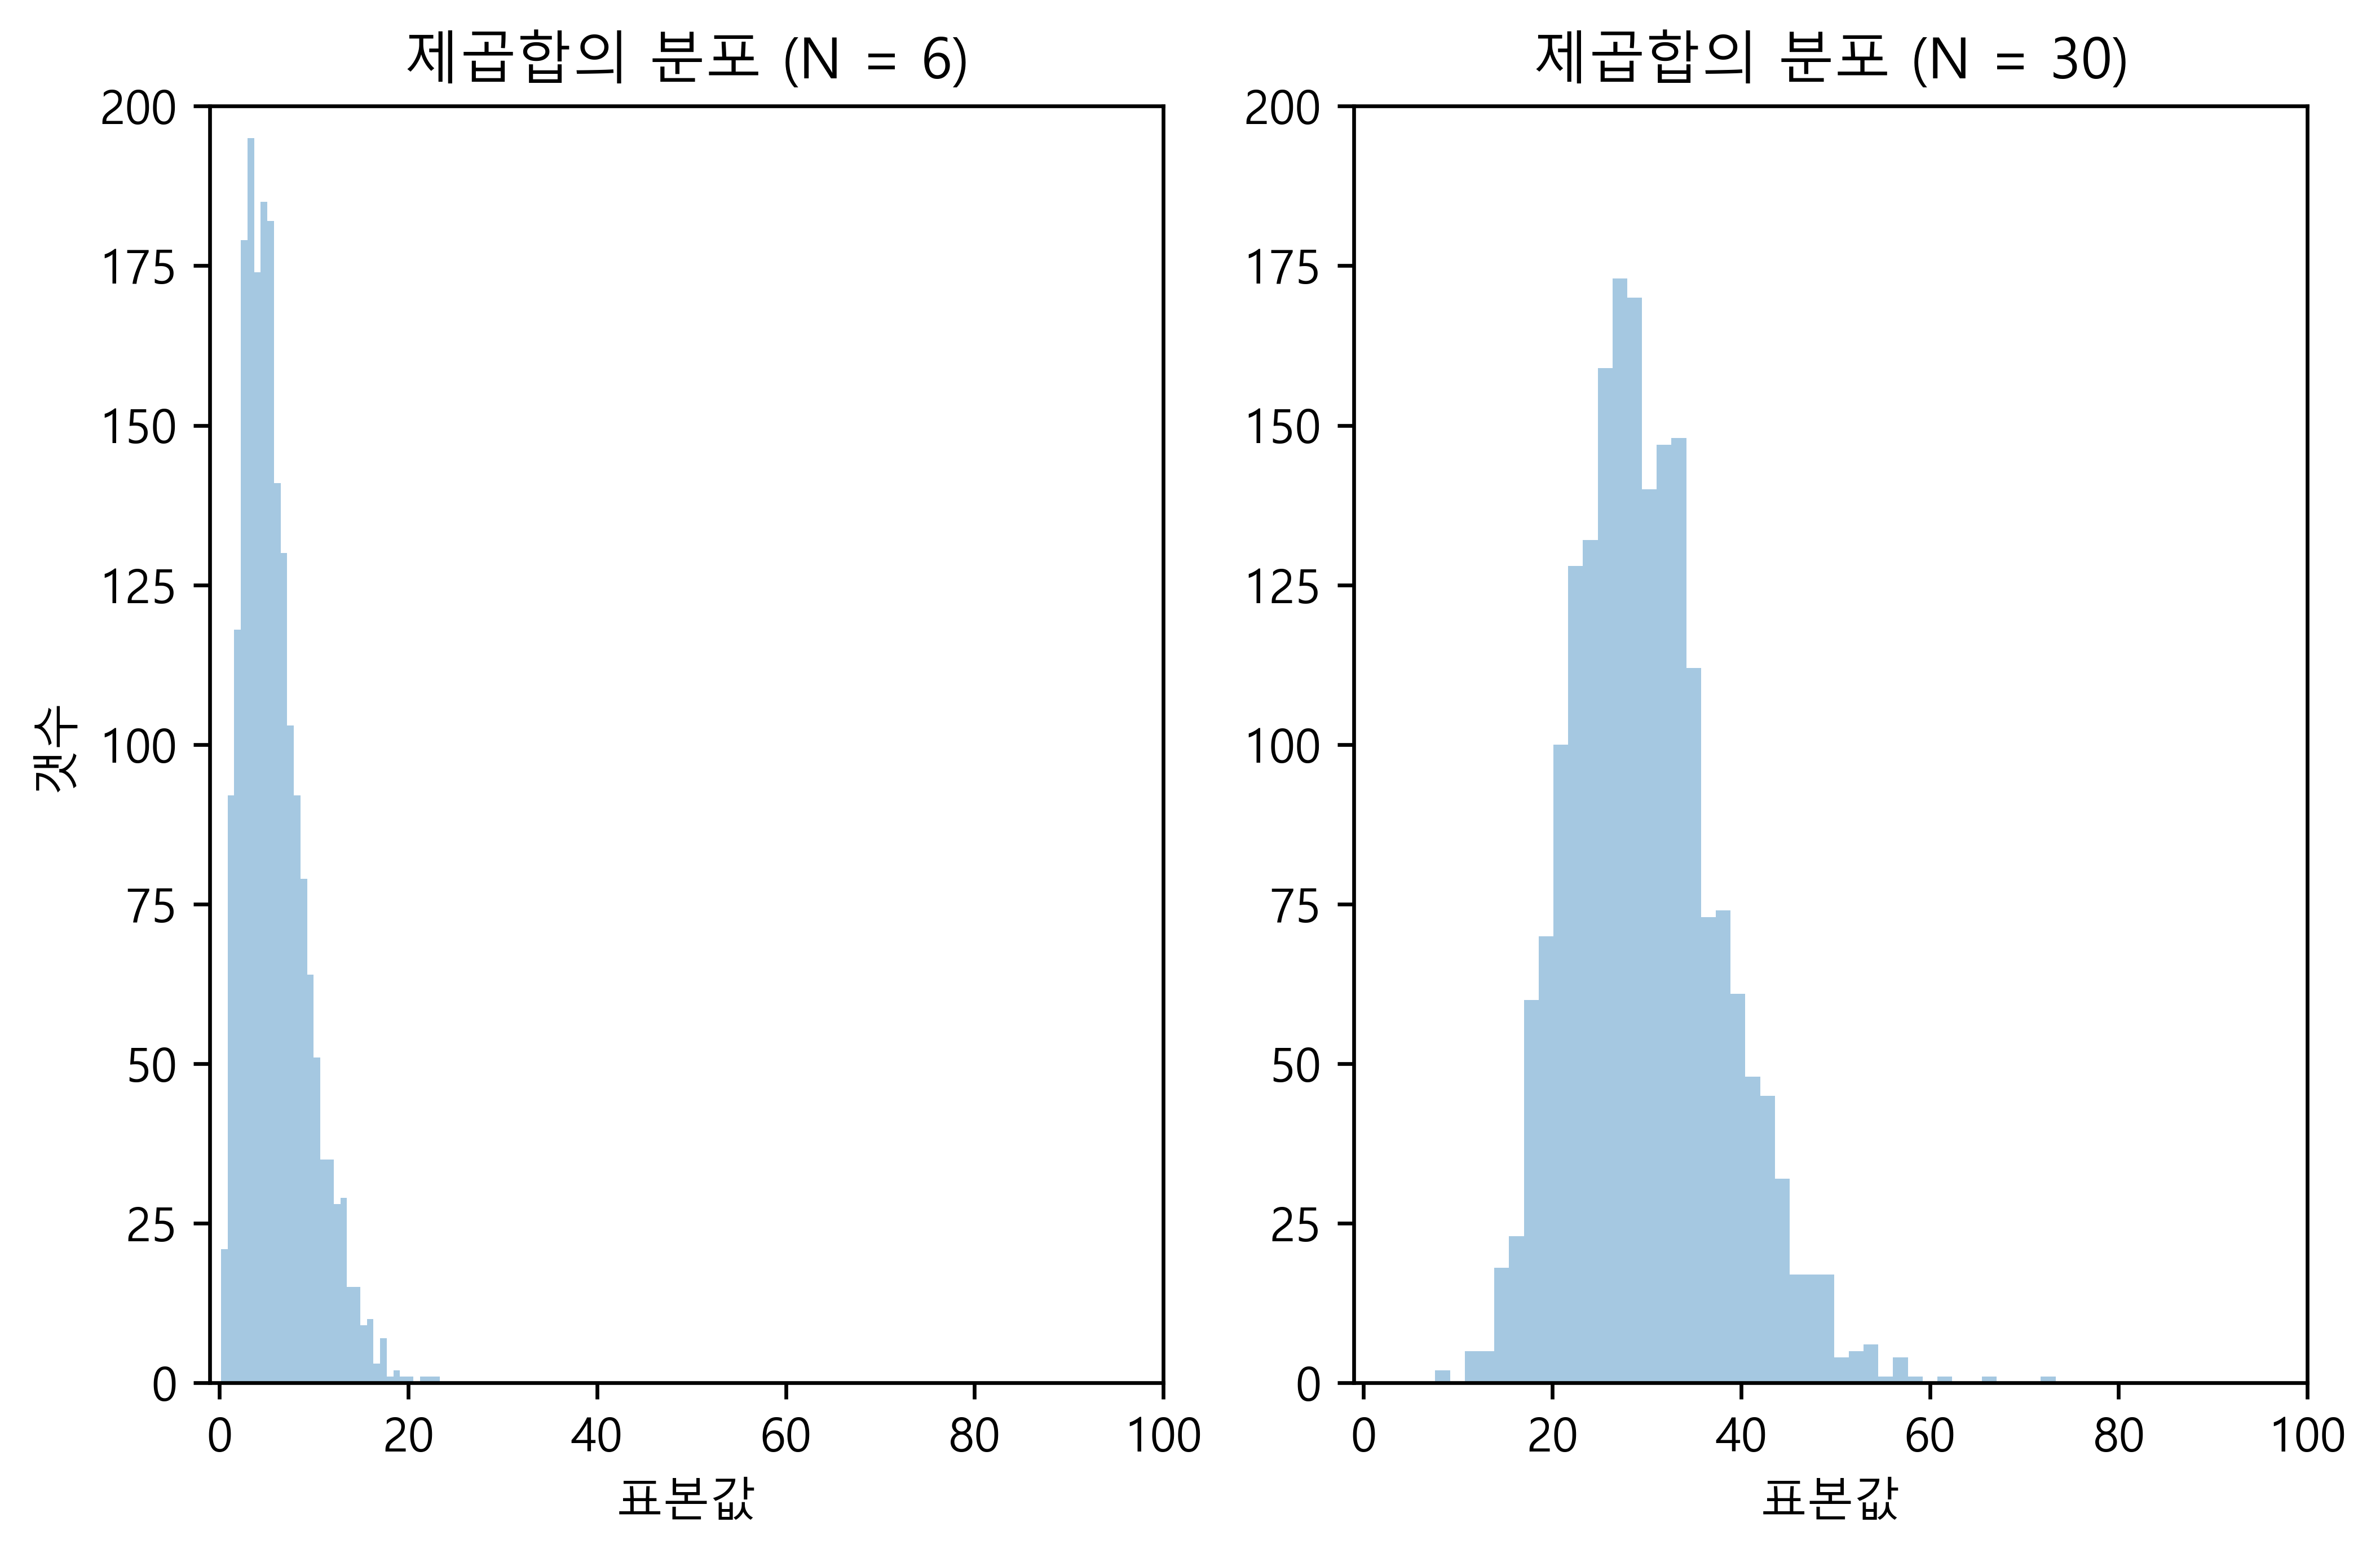

In [23]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 6
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 100)
plt.ylim(0, 200)
plt.title("제곱합의 분포 (N = 6)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 30
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 100)
plt.ylim(0, 200)
plt.title("제곱합의 분포 (N = 30)")
plt.xlabel("표본값")

plt.show()

## F분포

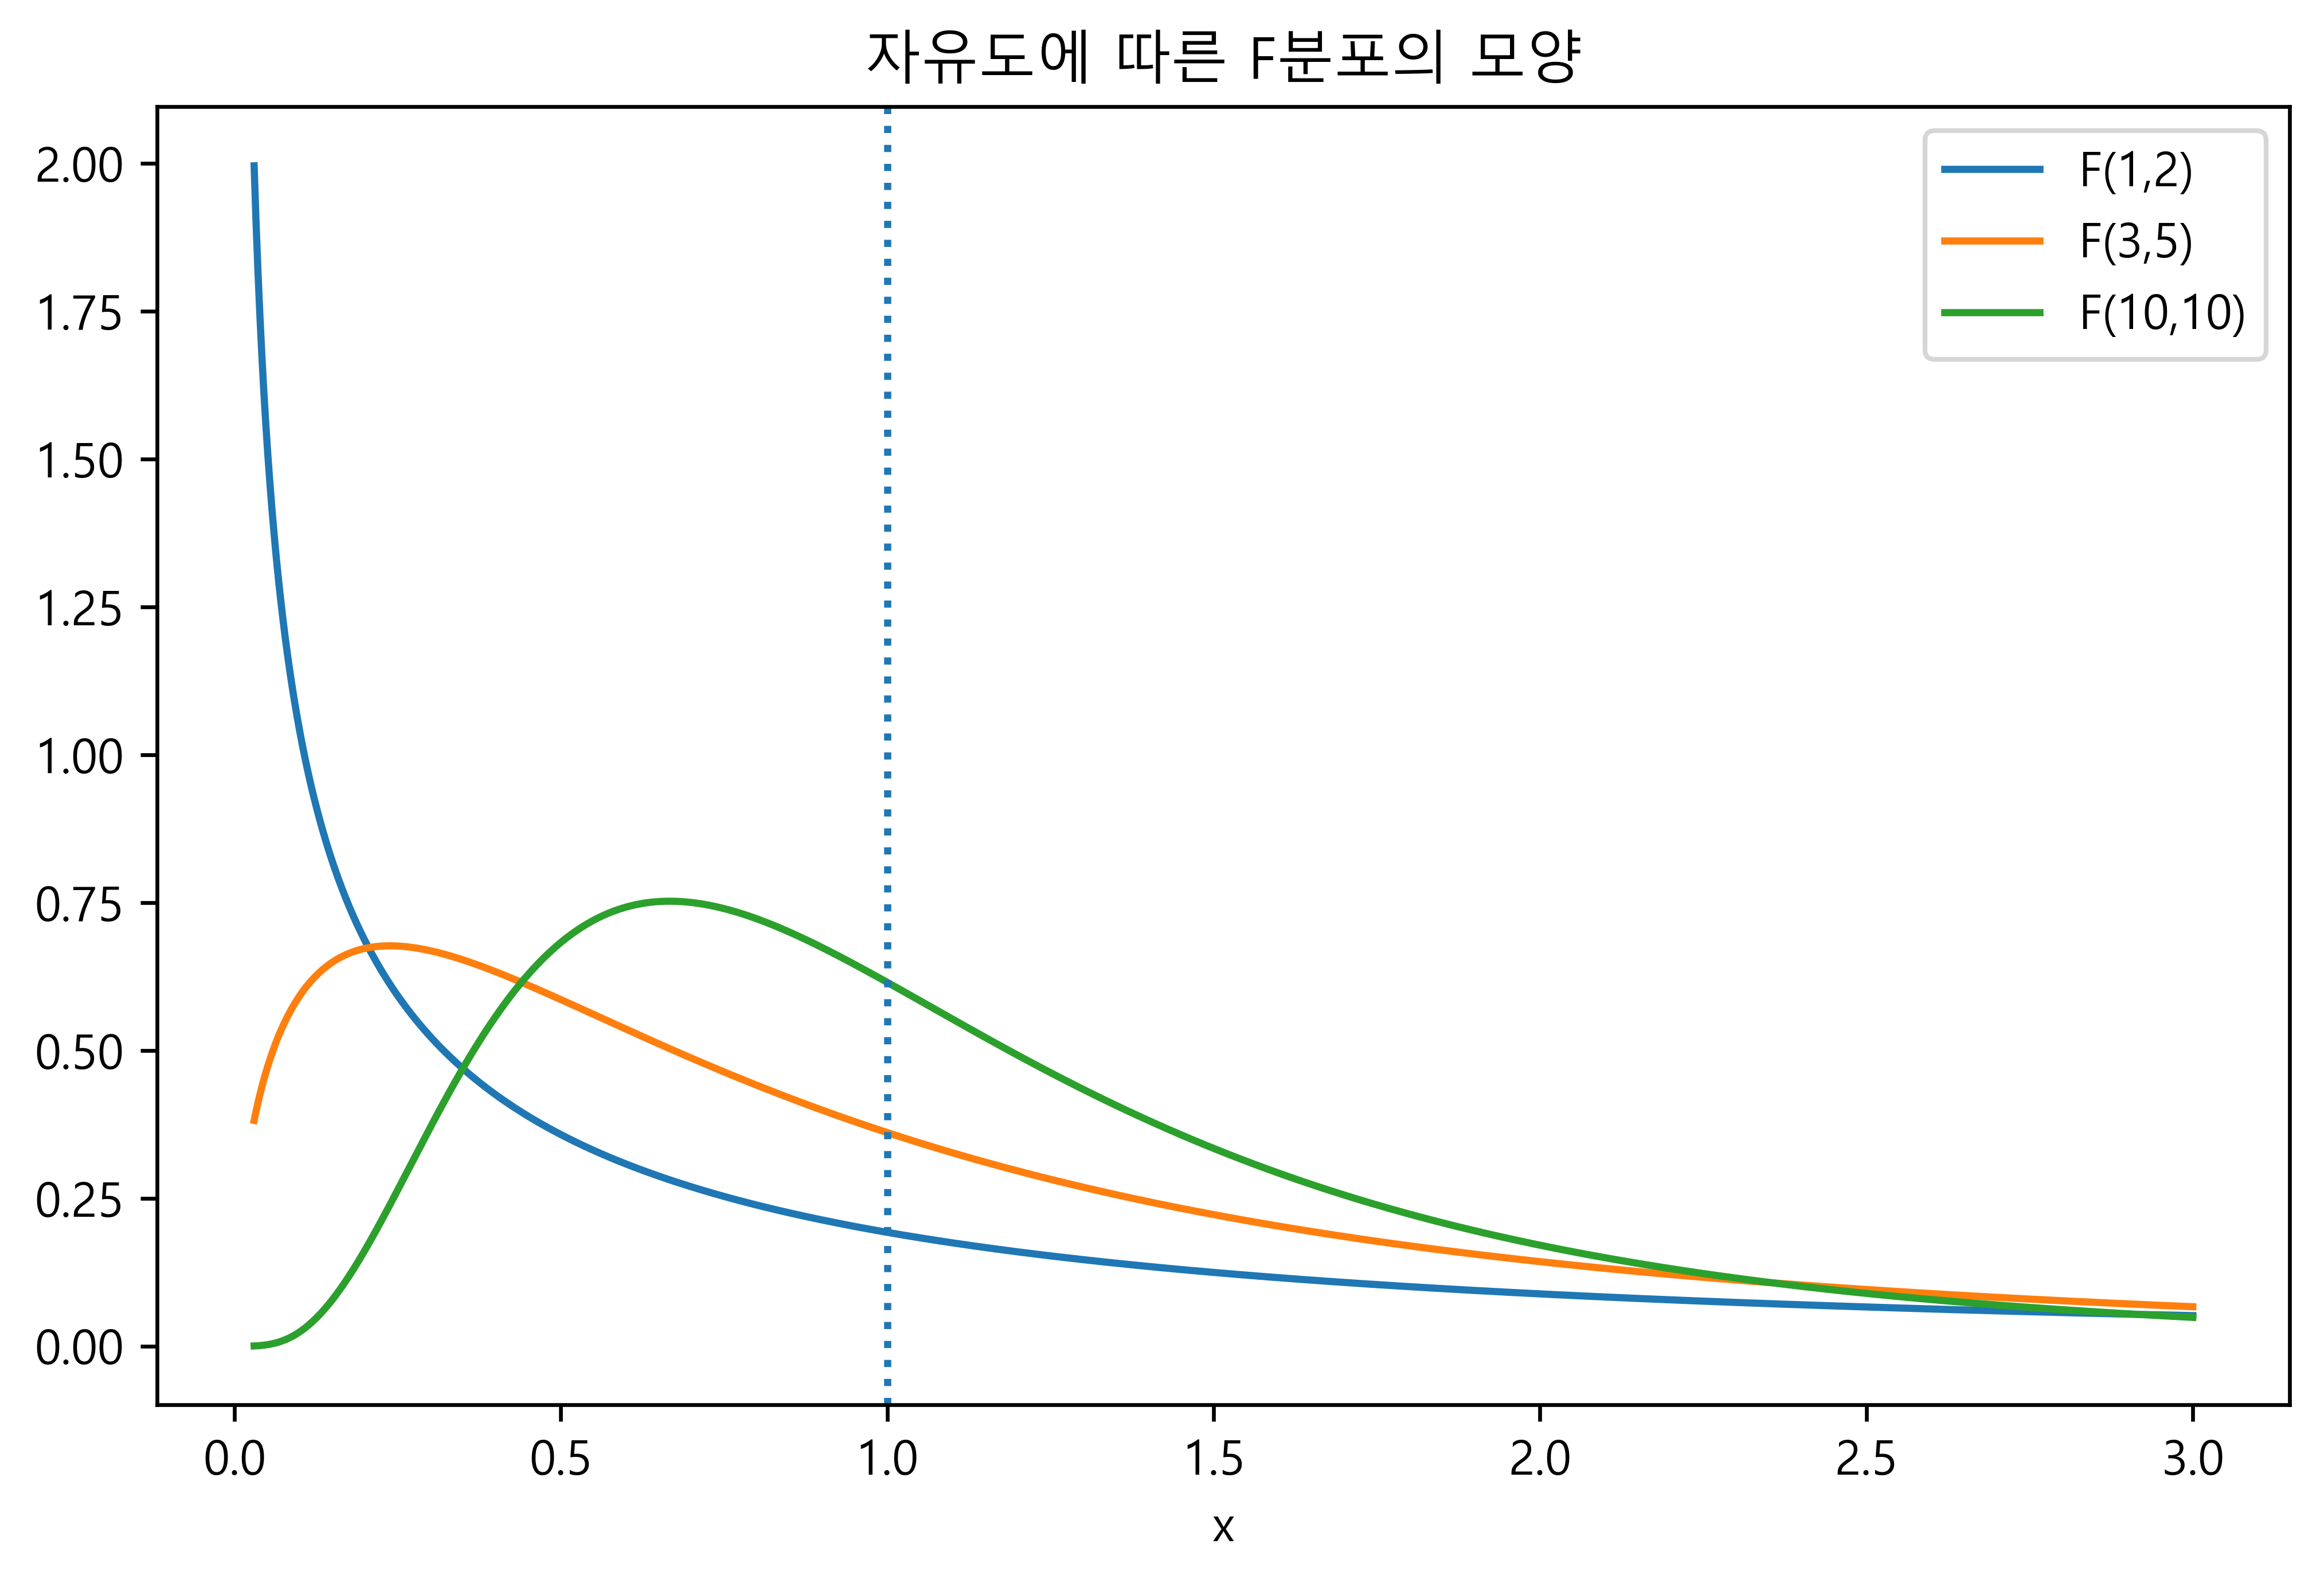

In [24]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="-", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

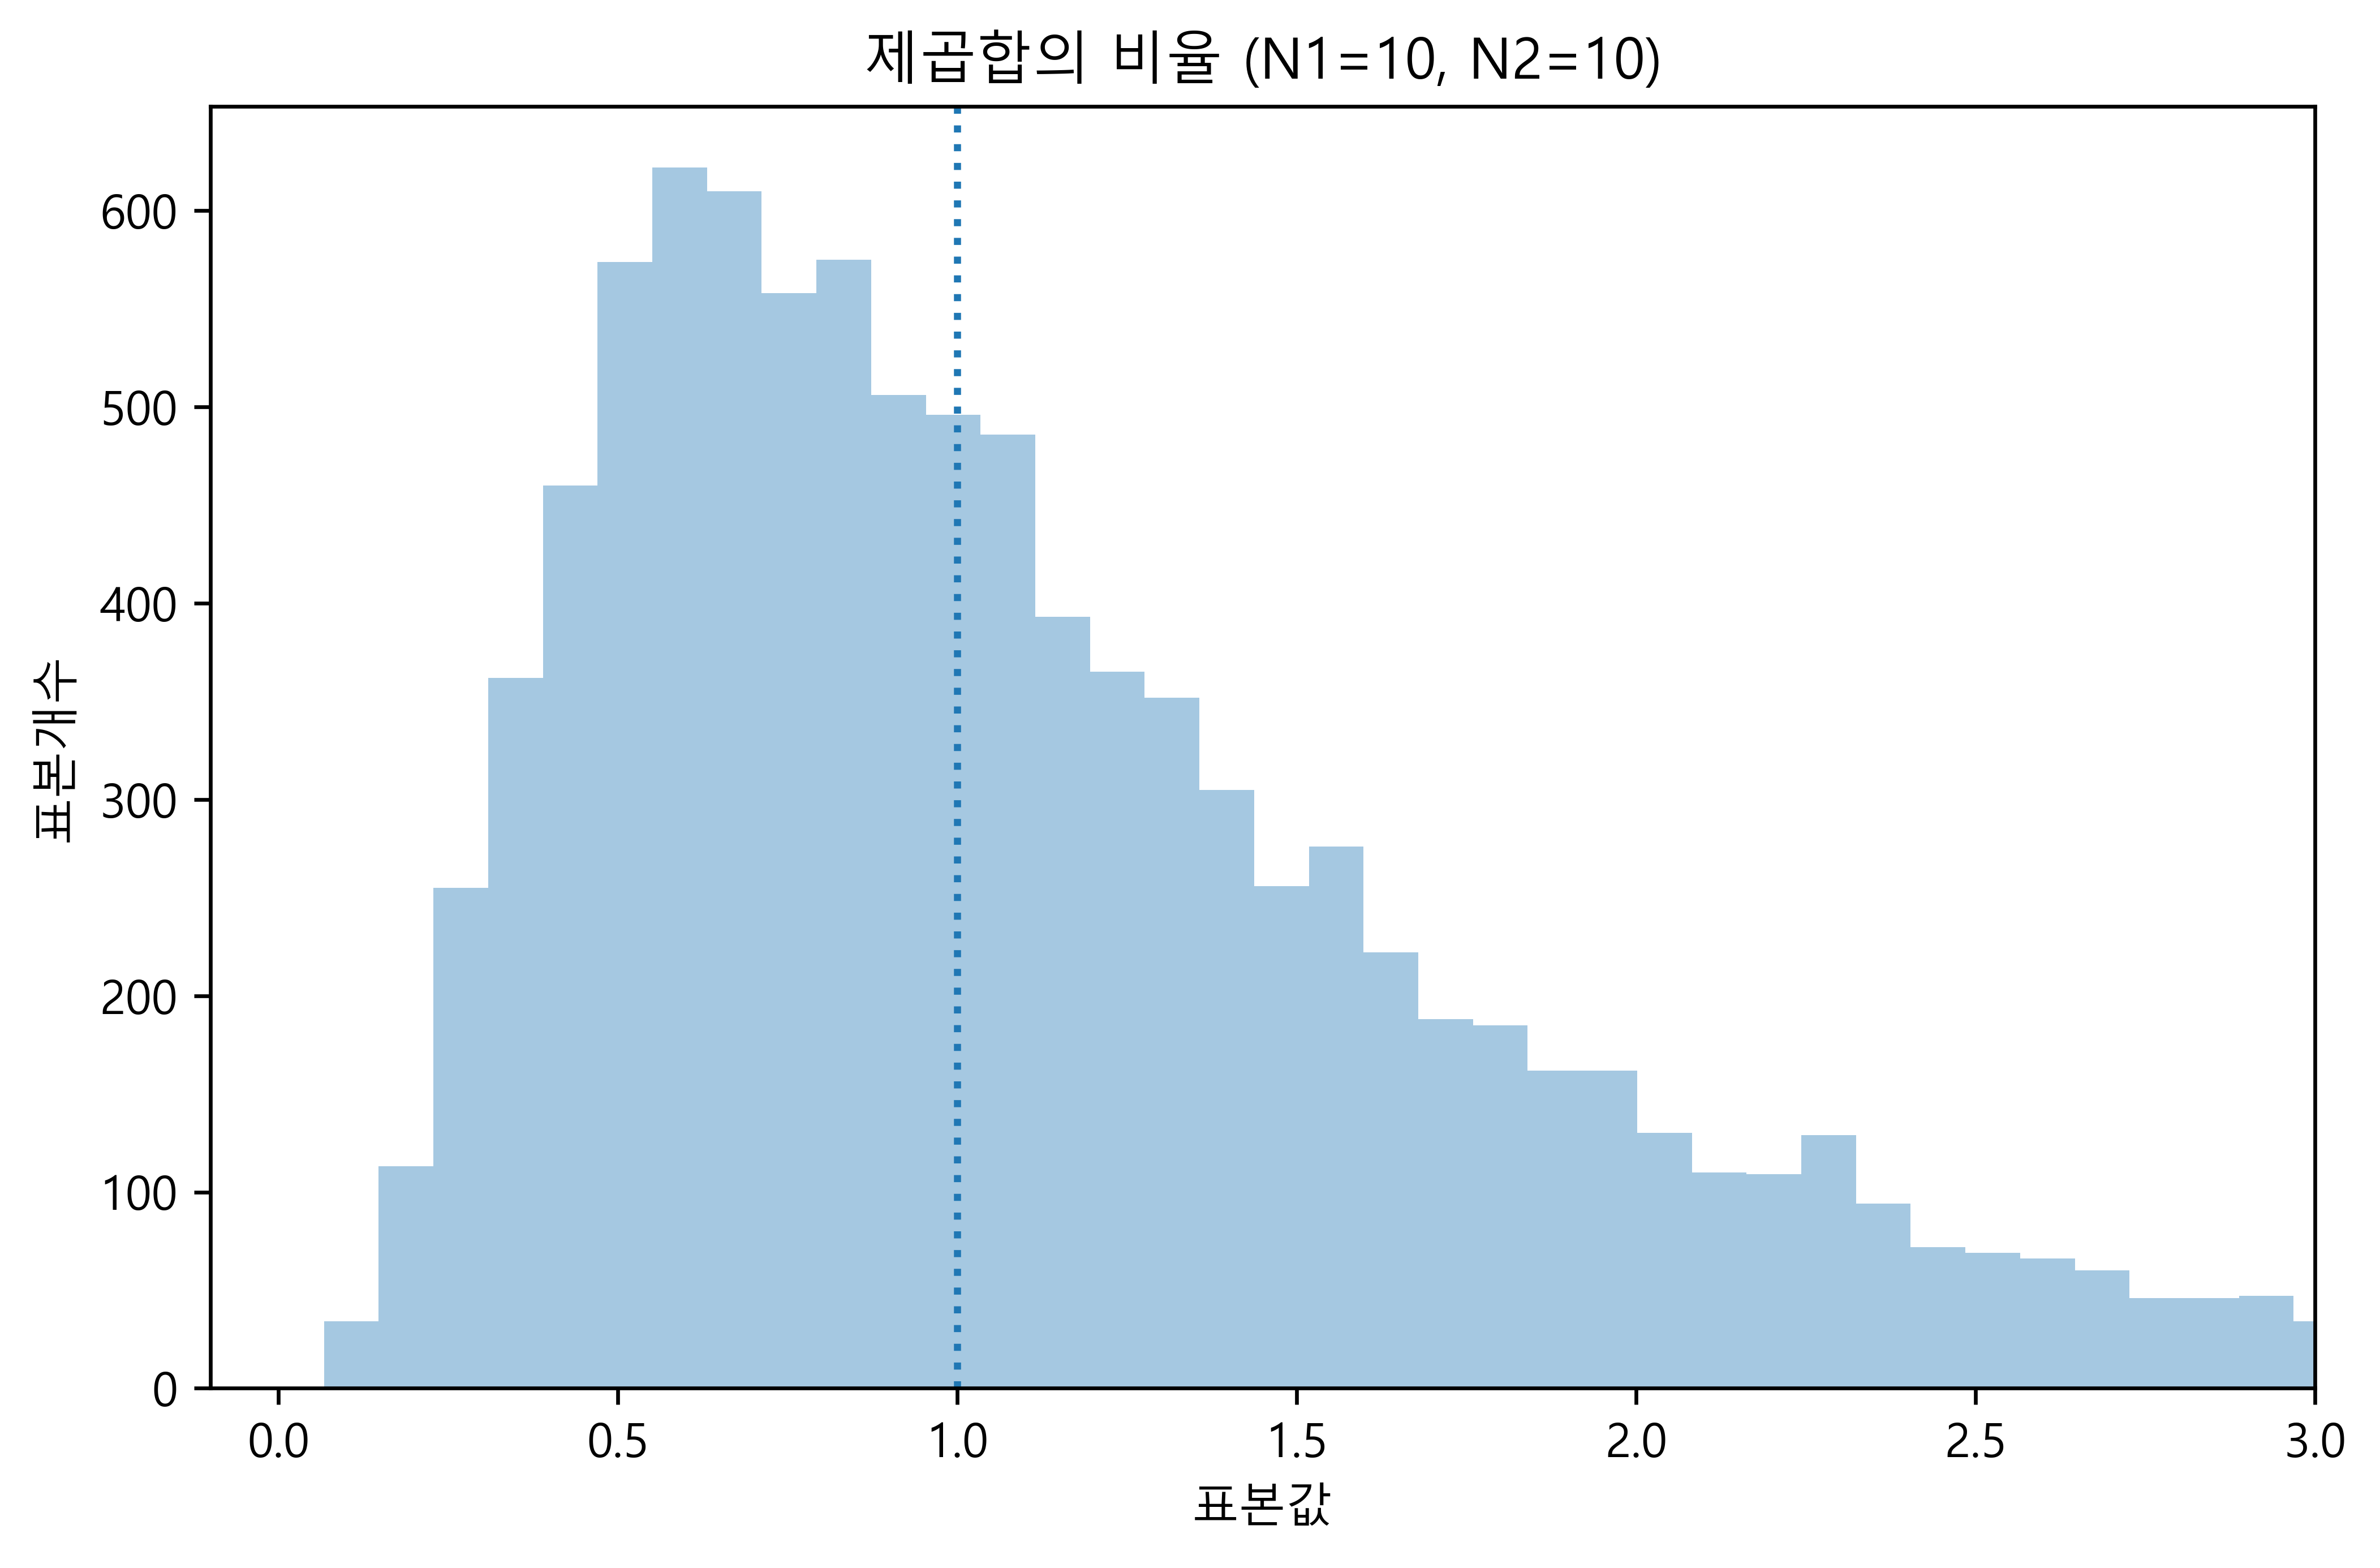

In [25]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2/t1
sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":")
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("표본개수")
plt.show()